In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import math

In [88]:
df=pd.read_csv("data/clean.csv")

In [89]:
print("columns: ",df.columns)
df.head()

columns:  Index(['num_im', 'sexe', 'date_naiss', 'age', 'sit_fam', 'job_ok', 'nbre_enf',
       'nature', 'design', 'ann_dipl', 'ordre', 'mode_ent', 'annee_ent',
       'date_ent', 'corps_ent', 'poste_ent', 'lieu_af', 'motif_affect',
       'fonction_af', 'division_af', 'service_af', 'direction_af', 'date_ps',
       'dat_retraite', 'poste_act', 'job_act', 'dt_echeance', 'tot_afct',
       'statut_act'],
      dtype='object')


num_im      sexe  date_naiss   age   sit_fam  job_ok  nbre_enf  \
0  275 850  MASCULIN  26/07/1974  44.0  MARIE(E)       0         1   
1  318 069  MASCULIN  11/06/1979  39.0  MARIE(E)       1         2   
2  318 069  MASCULIN  11/06/1979  39.0  MARIE(E)       1         2   
3  318 069  MASCULIN  11/06/1979  39.0  MARIE(E)       1         2   
4  318 069  MASCULIN  11/06/1979  39.0  MARIE(E)       1         2   

       nature                                             design  ann_dipl  \
0     DIPLOME         CERTIFICAT D'ETUDES PRIMAIRES ELEMENTAIRES       NaN   
1  CERTIFICAT                           GRAPHISTE ET MAQUETTISTE       NaN   
2     DIPLOME  DIPLOME D'INGENIEUR EN GENIE ELECTRONIQUE MANAGER    2008.0   
3     DIPLOME    DIPLOME DE TECHNICIEN SUPERIEUR EN ELECTRONIQUE    2000.0   
4  CERTIFICAT                   ADMINISTRATION RESEAUX-AUF JREWS       NaN   

   ...  division_af service_af  direction_af  date_ps dat_retraite poste_act  \
0  ...          NaN        SOC           DSE      NaN       2034.0      22TP   
1  ...          NaN        SOC           DSE      NaN       2039.0      22TP   
2  ...          NaN        SOC           DSE      NaN       2039.0      22TP   
3  ...          NaN        SOC           DSE      NaN       2039.0      22TP   
4  ...          NaN        SOC           DSE      NaN       2039.0      22TP   

                     job_act dt_echeance tot_afct   statut_act  
0                    ECOREUR      2019.0        3  EN FONCTION  
1  CHEF DE SITE INFORMATIQUE      2013.0        1  EN FONCTION  
2  CHEF DE SITE INFORMATIQUE      2013.0        1  EN FONCTION  
3  CHEF DE SITE INFORMATIQUE      2013.0        1  EN FONCTION  
4  CHEF DE SITE INFORMATIQUE      2013.0        1  EN FONCTION  

[5 rows x 29 columns]

In [90]:
qualitative = []
quantitative = []

for variable in df.columns.tolist():
    if df.dtypes[variable] in ['float64', 'int64']:
        quantitative.append(variable)
    else :
        qualitative.append(variable)

### qualitative

In [32]:
qualitative

['num_im',
 'sexe',
 'date_naiss',
 'sit_fam',
 'nature',
 'design',
 'mode_ent',
 'corps_ent',
 'poste_ent',
 'lieu_af',
 'motif_affect',
 'fonction_af',
 'division_af',
 'service_af',
 'direction_af',
 'poste_act',
 'job_act',
 'statut_act']

### quantitative

In [33]:
quantitative

['age',
 'job_ok',
 'nbre_enf',
 'ann_dipl',
 'ordre',
 'annee_ent',
 'date_ent',
 'date_ps',
 'dat_retraite',
 'dt_echeance',
 'tot_afct']

In [34]:
def processPerLevels(data,list_feature):
    catHead = ['Feature', 'Level', 'Count', 'Frequence %']
    count = []
    freq = []
    feature_all = []
    list_level_all = []
    for feature in list_feature:
        
        list_level = data[feature].unique().tolist()

        len_level = len(list_level)

        for level in list_level:
            count_level = len(data.loc[data[feature] == level])
            count.append(count_level)
            freq_level = count_level * 100/len(data)
            freq.append(round(freq_level, 2))
            feature_all.append(feature)
            list_level_all.append(level)
    
    resultDf = pd.DataFrame(columns=catHead)
    resultDf['Level'] = list_level_all
    resultDf['Feature'] = feature_all
    resultDf['Count'] = count
    resultDf['Frequence %'] = freq
    resultDf.set_index(['Feature', 'Level'], inplace=True)
    return resultDf

In [35]:
def getCountModalite(data,list_feature):
    head = ['Feature','Count of level']
    feature_all = []
    count_modalite = []
    
    for feature in list_feature : 
        feature_all.append(feature)
        count_modalite.append(len(pd.unique(data[feature])))
        
    resultDf = pd.DataFrame(columns=head)
    resultDf['Feature'] = feature_all
    resultDf['Count of level'] = count_modalite
    resultDf.set_index(['Feature'], inplace=True)
    return resultDf

In [91]:
variable_qualitative_liste = list(qualitative)
getCountModalite(df,variable_qualitative_liste)

Count of level
Feature                     
num_im                  1183
sexe                       2
date_naiss              1123
sit_fam                    5
nature                     6
design                  1614
mode_ent                   6
corps_ent                 34
poste_ent                 83
lieu_af                  107
motif_affect              81
fonction_af              359
division_af               90
service_af                54
direction_af              23
poste_act                 60
job_act                  427
statut_act                 5

<h2><center>Nombre de modalite pour chaque feature</center></h2>

### NUM_IM

In [37]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[0]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                      
num_im  243 881    180         1.17
        250 115    130         0.84
        273 354    120         0.78
        236 954    108         0.70
        280 096    104         0.67
        280 091    100         0.65
        282 299     99         0.64
        250 861     98         0.63
        276 158     90         0.58
        306 532     81         0.52
        271 977     77         0.50
        276 154     72         0.47
        249 855     70         0.45
        304 452     66         0.43
        246 923     66         0.43
        290 980     66         0.43
        279 619     65         0.42
        304 422     60         0.39
        282 239     60         0.39
        271 970     60         0.39
        292 373     60         0.39
        282 279     60         0.39
        273 366     60         0.39
        273 349     60         0.39
        258 865     56         0.36
        141 854     56         0.36
        246 922     55         0.36
        278 532     55         0.36
        246 911     54         0.35
        275 767     54         0.35
        304 436     54         0.35
        276 171     54         0.35
        304 449     52         0.34
        282 249     52         0.34
        290 978     50         0.32
        280 095     50         0.32
        282 231     50         0.32
        273 331     49         0.32
        268 452     49         0.32
        304 432     49         0.32
        268 514     49         0.32
        247 374     48         0.31
        273 327     48         0.31
        295 761     48         0.31
        278 993     48         0.31
        271 968     48         0.31
        251 813     48         0.31
        250 112     45         0.29
        304 442     45         0.29
        295 809     45         0.29
        278 954     45         0.29
        282 252     44         0.28
        278 735     42         0.27
        275 801     42         0.27
        249 598     42         0.27
        213 002     42         0.27
        278 965     42         0.27
        295 776     42         0.27
        275 793     42         0.27
        273 326     42         0.27
        275 795     42         0.27
        237 734     42         0.27
        259 200     42         0.27
        291 618     42         0.27
        279 622     42         0.27
        273 364     40         0.26
        273 362     40         0.26
        280 090     40         0.26
        275 830     40         0.26
        304 440     40         0.26
        304 419     40         0.26
        282 263     40         0.26
        273 343     40         0.26
        282 265     40         0.26
        304 443     40         0.26
        273 304     40         0.26
        276 155     40         0.26
        295 789     40         0.26
        295 785     36         0.23
        278 722     36         0.23
        282 237     36         0.23
        278 976     36         0.23
        304 448     36         0.23
        295 797     36         0.23
        275 792     36         0.23
        273 359     36         0.23
        273 316     36         0.23
        273 335     36         0.23
        282 247     36         0.23
        275 902     36         0.23
        304 423     35         0.23
        304 445     35         0.23
        250 113     35         0.23
        276 170     35         0.23
        271 984     35         0.23
        304 428     35         0.23
        275 771     35         0.23
        275 836     35         0.23
        304 441     35         0.23
        295 799     35         0.23
        282 253     35         0.23
        275 912     35         0.23
        304 426     35         0.23
        273 322     33         0.21
        331 004     32         0.21
        183 349     32         0.21
        278 959     32         0.21
        271 959     32         0.21
        271 978     32         0.21
        282 304     3

### SEXE

In [38]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[1]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                       
sexe    MASCULIN  10541        68.27
        FEMININ    4900        31.73

### CODEBUR

In [39]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[2]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature    Level                         
date_naiss 04/05/1962    180         1.17
           16/03/1958    130         0.84
           12/05/1977    120         0.78
           19/12/1976    111         0.72
           01/01/1958    108         0.70
           13/03/1973    100         0.65
           20/02/1978     99         0.64
           20/07/1961     98         0.63
           06/01/1975     90         0.58
           03/01/1973     81         0.52
           27/05/1963     77         0.50
           03/05/1966     76         0.49
           20/11/1971     72         0.47
           01/09/1963     70         0.45
           10/05/1971     69         0.45
           19/07/1978     66         0.43
           09/03/1971     66         0.43
           02/09/1980     65         0.42
           05/06/1961     60         0.39
           21/07/1977     60         0.39
           02/03/1965     60         0.39
           13/03/1965     60         0.39
           30/06/1972     60         0.39
           16/02/1975     60         0.39
           21/11/1981     60         0.39
           25/03/1959     56         0.36
           12/09/1955     56         0.36
           26/08/1965     55         0.36
           25/09/1972     55         0.36
           10/02/1971     54         0.35
           15/10/1981     54         0.35
           12/09/1979     54         0.35
           22/03/1971     54         0.35
           07/11/1976     54         0.35
           06/04/1964     54         0.35
           15/03/1968     53         0.34
           12/02/1971     52         0.34
           11/07/1979     52         0.34
           26/04/1976     52         0.34
           29/05/1978     50         0.32
           04/10/1979     50         0.32
           21/05/1977     50         0.32
           11/01/1970     50         0.32
           15/04/1967     49         0.32
           13/07/1968     49         0.32
           07/02/1980     49         0.32
           07/12/1967     49         0.32
           06/09/1963     48         0.31
           01/08/1972     48         0.31
           17/12/1969     48         0.31
           09/03/1975     48         0.31
           11/11/1961     48         0.31
           20/10/1969     46         0.30
           01/08/1970     45         0.29
           10/05/1974     45         0.29
           02/08/1969     45         0.29
           28/11/1978     45         0.29
           24/11/1967     44         0.28
           17/11/1972     44         0.28
           18/08/1971     44         0.28
           28/11/1962     44         0.28
           08/02/1974     43         0.28
           01/05/1956     42         0.27
           03/10/1978     42         0.27
           16/06/1967     42         0.27
           26/05/1968     42         0.27
           20/08/1981     42         0.27
           08/11/1977     42         0.27
           26/01/1966     42         0.27
           16/09/1967     42         0.27
           24/09/1978     42         0.27
           30/01/1967     42         0.27
           23/02/1963     42         0.27
           30/10/1972     42         0.27
           06/08/1956     42         0.27
           25/09/1969     40         0.26
           30/03/1974     40         0.26
           06/12/1974     40         0.26
           28/12/1980     40         0.26
           23/05/1980     40         0.26
           02/06/1959     40         0.26
           19/06/1979     40         0.26
           01/01/1981     40         0.26
           16/03/1960     40         0.26
           26/08/1972     40         0.26
           19/04/1971     40         0.26
           08/08/1977     40         0.26
           28/01/1969     38         0.25
           30/11/1980     38         0.25
           28/12/1978     38         0.25
           13/03/1979     37         0.24
           06/01/1973     37         0.24
           30/11/1974     36         0.23
           14/09/1957     36     

### LIEU_AF

In [40]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[3]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                          
sit_fam MARIE(E)     12385        80.21
        CELIBATAIRE   1877        12.16
        DIVORCE(E)     566         3.67
        VEUF(VE)       293         1.90
        NaN              0         0.00

#### design

In [41]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[4]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                       
nature  DIPLOME                    9485        61.43
        APTITUDE PROFESSIONNEL     2634        17.06
        CERTIFICAT                 1981        12.83
        FORMATION                   690         4.47
        ATTESTATION                 442         2.86
        APTITUDE PROFESSIONNELLE    209         1.35

#### mode_ent

In [42]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[5]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
design  CEPE                                                 1277         8.27
        BEPC                                                 1077         6.97
        DIPLOME DE HAUTES ETUDES EN ADMINISTRATION DOUA...    579         3.75
        BACCALAUREAT                                          540         3.50
        BACCALAUREAT A2                                       353         2.29
        BACCALAUREAT D                                        206         1.33
        DIPLOME D'ETUDES SUPERIEURES EN DOUANES               190         1.23
        FORMATION MILITAIRE                                   169         1.09
        RAPPROCHEMENT DES DONNEES COMPTABLES                  153         0.99
        MAITRISE EN DROIT PRIVE                               143         0.93
        INFORMATIQUE                                          140         0.91
        EX-BEPC                                               131         0.85
        MANAGEMENT ET LEADERSHIP                              130         0.84
        LICENCE EN GESTION                                    123         0.80
        BACCALAUREAT SERIE D                                  120         0.78
        BREVET D'ETUDES DU PREMIER CYCLE                      119         0.77
        MAITRISE EN GESTION                                   111         0.72
        BUREAUTIQUE                                           110         0.71
        BACCALAUREAT C                                        108         0.70
        CERTIFICAT D'ETUDES PRIMAIRES ELEMENTAIRES            100         0.65
        BACCALAUREAT SERIE C                                   99         0.64
        BREVET D'AGENT D'EXECUTION                             89         0.58
        SYDONIA++                                              86         0.56
        LICENCE EN DROIT                                       79         0.51
        INFORMATIQUE BUREAUTIQUE                               78         0.51
        BACCALAUREAT SERIE A2                                  77         0.50
        CFEPCES                                                76         0.49
        MAITRISE EN DROIT                                      75         0.49
        BREVET TECHNIQUE                                       71         0.46
        BACCALAUREAT TECHNIQUE                                 64         0.41
        MAITRISE ES-SCIENCES ECONOMIQUES                       62         0.40
        LEADERSHIP                                             60         0.39
        BACCALAUREAT A1                                        60         0.39
        LEADERSHIP ET MANAGEMENT                               56         0.36
        FORMATION MILITAIRE ELEMENTAIRE                        53         0.34
        ANGLAIS                                                52         0.34
        MAITRISE EN ECONOMIE                                   48         0.31
        BACCALAUREAT G2                                        45         0.29
        MECANIQUE AUTOMOBILE                                   45         0.29
        MISE A NIVEAU                                          44         0.28
        COMMERCE INTERNATIONAL                                 43         0.28
        BACCALAUREAT+3                                         38         0.25
        MAITRISE ES SCIENCES ECONOMIQUES                       37         0.24
        FORMATION DE MISE A NIVEAU                             36         0.23
        MANAGEMENT                                             36         0.23
        LICENCE EN ECONOMIE                                    36         0.23
        BACCALAUREAT+2                                         36         0.23
        SECRETARIAT                                            34         0.22
        ETHIQUE ET DEONTOLOGIE                                 34         0.22
        GESTION AXEE SUR LES RE

### corps_ent 	

In [43]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[6]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature  Level                                     
mode_ent CONCOURS DIRECT         11775        76.26
         CONTRAT D'ENGAGEMENT     2521        16.33
         DECISION D'ENGAGEMENT     984         6.37
         AFFECTATION DEFINITIVE    146         0.95
         DETACHEMENT                 8         0.05
         NaN                         0         0.00

### poste_ent 	

In [44]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[7]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature   Level                                                       
corps_ent INSPECTEUR DES DOUANES                               2789   
          CONTROLEUR DES DOUANES                               2649   
          AGENT DE CONSTATATION DES DOUANES                    2326   
          PREPOSE DES DOUANES                                  2166   
          EFA3                                                 1565   
          AGENT D'ENCADREMENT DES DOUANES                      1219   
          ELD4                                                  899   
          EFA4                                                  334   
          EFA8                                                  265   
          EFA2                                                  168   
          ASSISTANT D'ENSEIGNEMENT SUPERIEUR ET DE RECHERCHE    140   
          EFA6                                                  117   
          CHEF DE BUREAU DES SCES FINANCIERS                     90   
          EMPLOYE DE COURTE DUREE                                89   
          EFA1                                                   88   
          PROFESSEUR CERTIFIE                                    88   
          ADMINISTRATEUR DE SERVICE DE L' A.N.                   67   
          OFFICIER DE POLICE                                     64   
          MILITAIRE                                              60   
          INSPECTEUR DU TRAVAIL ET DES LOIS SOCIALES             41   
          ASSISTANT D'ADMINISTRATION                             40   
          EFA5                                                   36   
          ADJOINT D'ADMINISTRATION                               34   
          ADMINISTRATEUR D'UNIVERSITE                            21   
          SOUS-CHEF DE BUREAU DES SCES FINANCIERS                18   
          INSPECTEUR PENITENTIAIRE                               16   
          EFA7                                                   11   
          PERCEPTEUR DES FINANCES                                10   
          EFA9                                                    8   
          CONTROLEUR DES IMPOTS                                   7   
          ADMINISTRATEUR CIVIL                                    5   
          INGENIEUR PRINCIPAL DE LA STATISTIQUE                   4   
          ADMINISTRATEUR DES SCES FINANCIERS                      3   
          NaN                                                     0   

                                                              Frequence %  
Feature   Level                                                            
corps_ent INSPECTEUR DES DOUANES                                    18.06  
          CONTROLEUR DES DOUANES                                    17.16  
          AGENT DE CONSTATATION DES DOUANES                         15.06  
          PREPOSE DES DOUANES                                       14.03  
          EFA3                                                      10.14  
          AGENT D'ENCADREMENT DES DOUANES                            7.89  
          ELD4                                                       5.82  
          EFA4                                                       2.16  
          EFA8                                                       1.72  
          EFA2                                                       1.09  
          ASSISTANT D'ENSEIGNEMENT SUPERIEUR ET DE RECHERCHE         0.91  
          EFA6                                                       0.76  
          CHEF DE BUREAU DES SCES FINANCIERS                         0.58  
          EMPLOYE DE COURTE DUREE                                    0.58  
          EFA1                                                       0.57  
          PROFESSEUR CERTIFIE                                        0.57  
          ADMINISTRATEUR DE SERVICE DE L' A.N.                       0.43  
          OFFICIER DE POLICE                                 

### poste_act

In [45]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[8]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature   Level                       
poste_ent 21TO       2361        15.29
          12IV       1988        12.87
          11AN       1296         8.39
          42MG        782         5.06
          SLF         779         5.05
          34AS        632         4.09
          DESD        609         3.94
          DGD         606         3.92
          SAF         572         3.70
          DSCD        550         3.56
          AUTRES      507         3.28
          SAJC        414         2.68
          SCRS        407         2.64
          53TL        353         2.29
          35NB        276         1.79
          SAGRH       235         1.52
          51MD        195         1.26
          13AB        186         1.20
          22TP        164         1.06
          SS          154         1.00
          SVO         136         0.88
          SDI         131         0.85
          DAGD        117         0.76
          SED         113         0.73
          54TG        113         0.73
          SRH          89         0.58
          SLR          83         0.54
          63FI         66         0.43
          SE/DSCD      66         0.43
          SRI          65         0.42
          17ZO         63         0.41
          31AH         62         0.40
          61MK         58         0.38
          DLRE         56         0.36
          32SA         53         0.34
          SID          53         0.34
          ENSD         51         0.33
          15ZS         49         0.32
          DAJLF        48         0.31
          SSLC         45         0.29
          SAE          45         0.29
          SAGD         43         0.28
          SCAP         42         0.27
          16ZE         41         0.27
          CCSEAD       39         0.25
          62MJ         38         0.25
          23MA         37         0.24
          SSAE         37         0.24
          DAAD         37         0.24
          DTERD        34         0.22
          SBID         32         0.21
          SSD          32         0.21
          SAI          28         0.18
          SST          27         0.17
          BUDORS       27         0.17
          SDC          26         0.17
          SOC          24         0.16
          SCD          21         0.14
          DSE          21         0.14
          SCRU         20         0.13
          DLSD         20         0.13
          SCDD         19         0.12
          SRDAAMI      16         0.10
          SE           13         0.08
          SCC          12         0.08
          SSOC         11         0.07
          SRAR         11         0.07
          41AL         10         0.06
          PRMP          9         0.06
          DLV           9         0.06
          33VO          9         0.06
          DNFP          6         0.04
          25BT          6         0.04
          14MA          6         0.04
          SI            5         0.03
          24SM          5         0.03
          SF            3         0.02
          SFRC/DNF      2         0.01
          CIR           2         0.01
          SCSR          1         0.01
          CPERF         1         0.01
          CDL           1         0.01
          NaN           0         0.00

### job_act

In [46]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[9]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
lieu_af IVATO-AEROPORT                                       1854        12.01
        BUREAU DES DOUANES DE TOAMASINA PORT                 1463         9.47
        ANTANANARIVO                                         1350         8.74
        MAHAJANGA                                             646         4.18
        SERVICE DE LA LUTTE CONTRE LA FRAUDE                  612         3.96
        SERVICE DE LA LEGISLATION ET DE LA REGLEMENTATION     485         3.14
        MAMORY-IVATO                                          427         2.77
        SERVICE ADMINISTRATIF ET FINANCIER                    314         2.03
        SERVICE DES AFFAIRES JURIDIQUES ET DU CONTENTIEUX     309         2.00
        ANTSIRANANA                                           307         1.99
        SERVICE DE LA SURVEILLANCE ET DE LA LUTTE CONTR...    295         1.91
        TOAMASINA-PETROLES                                    290         1.88
        DIRECTION GENERALE DES DOUANES                        286         1.85
        TOLIARA                                               283         1.83
        SERVICE DU CONTROLE DES REGIMES SUSPENSIFS            243         1.57
        BS TOAMASINA                                          242         1.57
        ANTSIRABE                                             233         1.51
        DIRECTION DES STATISTIQUES ET DE LA COMPTABILIT...    225         1.46
        DIRECTION DES ENQUETES ET DE LA SURVEILLANCE DO...    224         1.45
        NOSY-BE                                               219         1.42
        SERVICE DE LA VALEUR ET DE L'ORIGINE                  188         1.22
        TAOLAGNARO                                            173         1.12
        SERVICE DES RELATIONS INTERNATIONALES                 170         1.10
        BS ANTANANARIVO                                       168         1.09
        FIANARANTSOA                                          162         1.05
        SERVICE DES ACTIONS ECONOMIQUES                       158         1.02
        SERVICE DES RESSOURCES HUMAINES                       157         1.02
        SERVICE DE L'INFORMATIQUE                             154         1.00
        SERVICE DU RENSEIGNEMENT ET DE L'ANALYSE DES RI...    146         0.95
        DIRECTION DES RESSOURCES ET DE LA FORMATION           142         0.92
        SERVICE DE L'INSPECTION DOUANIERE                     131         0.85
        BETAINOMBY DEDIE SHERRITT                             130         0.84
        SERVICE DE PILOTAGE ET DE COORDINATION DES BURE...    127         0.82
        DIRECTION DES SERVICES EXTERIEURS                     126         0.82
        MORONDAVA                                             124         0.80
        SERVICE DES EQUIPEMENTS                               115         0.74
        SERVICE DU RENSEIGNMT, DE LA DOC ET DE L'ASSIST...    114         0.74
        SERVICE DE COORDINATION DES ACTIONS DOUANIERES ...    105         0.68
        ANTENNE DES DOUANES ANOSISOA                          101         0.65
        SERVICE DE LA FORMATION                                96         0.62
        ANTENNE DES DOUANES AMBOHIBAO                          95         0.62
        SERVICE DES OPERATIONS COMMERCIALES                    95         0.62
        SERVICE DE SUIVI DES OPERATIONS COMMERCIALES           95         0.62
        SERVICE DES ETUDES ET DE LA DOCUMENTATION              92         0.60
        CELLULE DE COORDINATION,DE SUIVI ET D'EVALUATIO...     89         0.58
        MANAKARA                                               79         0.51
        VOHEMAR                                                77         0.50
        DIRECTION DES AFFAIRES JURIDIQUES ET DES LUTTES...     77         0.50
        ECOLE NATIONALE SUPERIEURE DES DOUANES                 74         0.48
        SERVICE ADMINISTRATIF E

###  lieu_af 	

In [47]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[10]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature      Level                                                           
motif_affect COMPLEMENT D'EFFECTIF                          3190        20.66
             Complement d'effectif                          2069        13.40
             NOMINATION                                      643         4.16
             NOMINATION SUR FONCTION                         541         3.50
             ABROGEE                                         454         2.94
             NOMINATION RECEVEUR                              58         0.38
             NOMINATION CHEF DE SERVICE                       34         0.22
             ABROGE                                           33         0.21
             NOMME DIRECTEUR                                  28         0.18
             CE                                               27         0.17
             NOMME RECEVEUR                                   26         0.17
             ANNULEE                                          21         0.14
             NOMME RECEVEUR DES DOUANES                       17         0.11
             NOMINATION CHEF DE POSTE                         16         0.10
             NOMINATION CHEF DE DIVISION                      16         0.10
             NOMME CHEF DE VISITE                             16         0.10
             1ERE AFFECTATION                                 15         0.10
             NOMME CHEF DE SERVICE                            15         0.10
             NOMME DIRECTEUR PAR INTERIM                      14         0.09
             NOMME CHEF DE DIVISION                           12         0.08
             MISE A DISPOSITION                               11         0.07
             MAINTIEN AU BUREAU 22TP                          10         0.06
             NOMINATION CHEF DE SITE                          10         0.06
             EQUIPE NATIONALE SYDONIA                         10         0.06
             NOMME CHEF DE PROJET                             10         0.06
             NOMINATION DIRECTEUR                              9         0.06
             NOMINATION CHEF DE DIV                            9         0.06
             FIN DE MISE A DISPOSITION ET NOMINATION           9         0.06
             REAFFECTATION                                     8         0.05
             CHEF DE DIVISION                                  7         0.05
             NOMME ADJOINT AU RECEVEUR                         7         0.05
             PREMIERE AFFECTATION                              7         0.05
             NOMME CHEF D'ANTENNE                              6         0.04
             PROJET ANALYSE DE MANIFESTE                       6         0.04
             MISE A LA DISPOSITION                             6         0.04
             MUTATION                                          6         0.04
             ABROGATION MAINTIEN 21TO                          6         0.04
             NOMME ADJOINT AU RECEVEUR SOARANO                 6         0.04
             NOMME CHEF DE BRIGADE SPECIALE                    6         0.04
             MAINTIEN AU POSTE                                 6         0.04
             NOMINATION DE CHEF DE SERVICE                     6         0.04
             DAME VISITEUSE                                    5         0.03
             NOMME COORDONNATEUR                               5         0.03
             NOMME RECEVEUR DES DOUANES D'ANTSIRANANA          5         0.03
             NOMME RECEVEUR DES DOUANES DE SAMBAVA             5         0.03
             NOUVELLEMENT NOMME INSPECTEUR                     5         0.03
             NOMINATION CHEF DIV                               5         0.03
             STAGIAIRE COMPLEMENT D'EFFECTIF                   5         0.03
             1ERE POSTE                                        4         0.03
             NOUVELLEMENT NOMME                                4         0.03
   

### motif_affect

In [48]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[11]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature     Level                                                       
fonction_af COMPLEMENT D'EFFECTIF                                1974   
            ABROGEE                                               170   
            RECEVEUR DES DOUANES                                  117   
            CHAUFFEUR                                              98   
            CHEF DE DIVISION                                       91   
            VERIFICATEUR                                           91   
            CHEF DE POSTE                                          82   
            CHEF DES OPERATIONS COMMERCIALES                       73   
            SECRETAIRE                                             59   
            CHEF DE SITE INFORMATIQUE                              56   
            CHEF DE VISITE                                         55   
            INFORMATICIEN                                          51   
            ABROGE                                                 47   
            ADJOINT AU RECEVEUR                                    46   
            COORDONNATEUR                                          44   
            PLANTON                                                43   
            IVL                                                    39   
            DIRECTEUR                                              25   
            CHARGE D'ETUDES                                        25   
            CHEF DU SERVICE SRI                                    25   
            CHEF DE SERVICE                                        21   
            RECEVEUR                                               21   
            DEPOSITAIRE COMPTABLE                                  20   
            CHARGE DE MISSION                                      19   
            CHEF DU SERVICE SAE                                    19   
            CHEF RET                                               17   
            RECEVEUR 42MG                                          17   
            DIRECTEUR GENERAL                                      17   
            CHEF DU SERVICE SLR                                    16   
            COORDONNATEUR DU CENTRE DE LIQUIDATION                 16   
            CHEF OPCO 42MG                                         15   
            RECEVEUR DES DOUANES 34AS                              14   
            CHEF DU SERVICE SLF                                    14   
            CHEF BMS                                               14   
            DIRECTEUR DES SERVICES EXTERIEURS                      14   
            DIRECTEUR DE L'ENSD PAR INTERIM                        14   
            RECEVEUR DES DOUANES 12IV                              14   
            DIRECTEUR DNFP                                         14   
            CHEF DE SITE                                           14   
            DIRECTEUR DE L'ENSD                                    14   
            RESPONSABLE DES AVANCEMENTS DES AGENTS AUXILIAIRES     14   
            VISITEUR                                               13   
            DIRECTEUR DAJLF                                        13   
            RECEVEUR DES DOUANES DE NOSY-BE                        12   
            ANALYSTE                                               12   
            AUDITEUR                                               12   
            RECEVEUR INTERIMAIRE                                   12   
            CHEF DE DIVISION FORMATION CONTINUE                    12   
            CHEF DE DIVISION DES RELATIONS AVEC LES USAGERS        12   
            COPCO                                                  12   
            CHEF DE DIVISION TARIF                                 12   
            CHEF DE DIVISION CONTENTIEUX                           11   
            DAME VISITEUSE                                         11   
            ENCADREUR                            

### fonction_af

In [49]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[12]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature     Level                                                       
division_af SOLDE                                                 100   
            RECETTE DES DOUANES MAHAJANGA                          59   
            EFFECTIF                                               59   
            RET                                                    22   
            DAA                                                    19   
            OPCO                                                   19   
            CONTROLE DES ENTREPRISES                               13   
            DIVISION PROGRAMMATION                                 12   
            DIVISION MATERIEL                                      12   
            FORMATION CONTINUE                                     12   
            CONTENTIEUX                                            12   
            OPDIV                                                  11   
            COORDINATION DES OPERATIONS ET UNITES DE SURV.         11   
            SUIVI FONCTIONNEL                                      10   
            INFORMATIQUE                                           10   
            RECOUVREMENT                                           10   
            ADJOINT AU RECEVEUR                                     9   
            ETUDES ET CONCEPTION                                    9   
            UNITE DOUANIERE CONTRE LES TRAFICS DE STUP              8   
            MATERIEL                                                8   
            SOCIALES ET LOISIRS                                     8   
            COMPTABILITE DES DOUANES                                7   
            SUIVI STRATEGIQUE                                       7   
            SECRETARIAT                                             7   
            ETUDES ET SUIVI FONCTIONNEL                             7   
            CENTRE DE COORDINATION 12IV                             7   
            ETUDES ET COORDINATION                                  7   
            DAR                                                     7   
            GESTION DE RENSEIGNEMENT ET RELATION INTER SCE          7   
            OPERATION DE SURVEILLANCE                               7   
            VALEUR EN DOUANES ET BDD                                6   
            PROGRAMMATION                                           6   
            OBSERVATOIRE DU DELAI DE DEDOUANEMENT                   5   
            INSPECTION                                              5   
            DIV.PRO.                                                5   
            APPLICATION CONVENTIONS INTERNATIONALES                 5   
            PROCEDURES DOUANIERES                                   5   
            DOCUMENTATION ET ARCHIVES                               5   
            AFFAIRES JURIDIQUES                                     5   
            GESTION DU PARC AUTOMOBILE                              5   
            RELATION AVEC LES USAGERS                               5   
            REGLEMENTATION                                          5   
            CONGE                                                   5   
            AGOA                                                    5   
            ETUDES                                                  5   
            CAP                                                     5   
            ECRITURE                                                5   
            ORIENTATION DU CONTROLE                                 5   
            CONTROLE RET                                            4   
            AUDIT ET PROCEDURE                                      4   
            COOPERATION REGIONALE                                   4   
            COOPERATION AVEC LES ORGANISATIONS INTLES               4   
            DIVPRO                                                  4   
            APPUI                                

### service_af

In [102]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[13]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  \
Feature    Level                                                       
service_af SPCB                                                 4502   
           SOC                                                   574   
           SSLC                                                  524   
           SLF                                                   346   
           SLR                                                   288   
           SRH                                                   276   
           SAF                                                   162   
           SAJC                                                  153   
           SVO                                                   150   
           SRAR                                                  140   
           SI                                                    128   
           SAE                                                   125   
           SRI                                                   116   
           SE                                                    113   
           SID                                                   105   
           SSOC                                                   94   
           SCAP                                                   91   
           SF                                                     89   
           SDC                                                    69   
           SCSR                                                   67   
           SCRS                                                   52   
           SRDAAMI                                                47   
           SSAE                                                   44   
           SED                                                    40   
           PRMP                                                   37   
           CPERF                                                  28   
           CDL                                                    21   
           SSC                                                    14   
           CELLULE DE GESTION DE PERFORMANCE                      14   
           CCSEAD                                                 10   
           SST                                                     9   
           SE/DSCD                                                 9   
           SCE APPUI                                               9   
           ENSD                                                    9   
           SERVICE DE COORDINATION ET DU SUIVI DES RE7 BUDGTR      7   
           SAI                                                     7   
           SCRU                                                    7   
           SECRETARIAT GENERAL DU MFB                              6   
           SCC                                                     6   
           SERVICE D'ENQUETE ET D'INVESTIGATION                    5   
           SDI                                                     5   
           SRH (EX-SAF)                                            5   
           SCOLARITE                                               4   
           SCAP (EX-SAF)                                           4   
           EXTERIEUR                                               4   
           CGP                                                     3   
           SSFRC                                                   3   
           EX-SAF                                                  2   
           EX-SST                                                  2   
           SS                                                      2   
           SAF/DNFP                                                2   
           SSD                                                     1   
           SAGD                                                    1   
           NaN                                                     0   

                              

### direction_af

In [101]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[14]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature      Level                                       
direction_af DSE                        4093        26.51
             DGD                         659         4.27
             DRF                         609         3.94
             DAJLF                       596         3.86
             DLV                         460         2.98
             DSCD                        376         2.44
             DLRE                        140         0.91
             DNFP                         54         0.35
             DLR                          52         0.34
             DESD                         16         0.10
             EX-DNFP                      14         0.09
             SPCB                         13         0.08
             DISCD                        13         0.08
             DAAD                         10         0.06
             DCI                           9         0.06
             SG DU MBDPA ANTANANARIVO      7         0.05
             MFB/SG                        6         0.04
             DAGD                          5         0.03
             SVO                           5         0.03
             EX-DLRE                       2         0.01
             DVL                           2         0.01
             DTERD                         1         0.01
             NaN                           0         0.00

### poste_act

In [52]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[15]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature   Level                     
poste_act 12IV     1906        12.34
          21TO     1510         9.78
          11AN     1430         9.26
          14MA      889         5.76
          SLF       865         5.60
          42MG      615         3.98
          SSLC      490         3.17
          DGD       449         2.91
          SLR       434         2.81
          BSTMM     419         2.71
          22TP      404         2.62
          SAJC      378         2.45
          SRAR      309         2.00
          DRF       247         1.60
          SVO       246         1.59
          63FI      244         1.58
          35NB      235         1.52
          SF        235         1.52
          SRH       221         1.43
          SI        215         1.39
          25BT      208         1.35
          53TL      206         1.33
          SPCB      205         1.33
          SCSR      201         1.30
          SID       200         1.30
          BSTNR     189         1.22
          13AB      179         1.16
          34AS      169         1.09
          SE        160         1.04
          SCAP      156         1.01
          33VO      154         1.00
          DSE       140         0.91
          SDC       138         0.89
          CDL       117         0.76
          DLV       109         0.71
          32SA       97         0.63
          DSCD       97         0.63
          54TG       93         0.60
          SRI        92         0.60
          51MD       92         0.60
          SSOC       87         0.56
          AUTRES     81         0.52
          SAE        79         0.51
          SSAE       60         0.39
          PRMP       55         0.36
          31AH       52         0.34
          CPERF      48         0.31
          DAJLF      47         0.30
          61MK       46         0.30
          BRX        37         0.24
          PRS        25         0.16
          ILMAU      24         0.16
          62MJ       15         0.10
          GNV         9         0.06
          PSMJG       9         0.06
          PSTUL       6         0.04
          PSTAO       6         0.04
          24SM        5         0.03
          PSNSB       4         0.03
          23MA        3         0.02

### job_act

In [92]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[16]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature Level                                                                 
job_act VERIFICATEUR                                          395         2.56
        CHAUFFEUR                                             271         1.76
        Visiteur ESCALE                                       268         1.74
        SECRETAIRE                                            237         1.53
        AGENT VISITEUR                                        230         1.49
        Secr?taire                                            219         1.42
        ADJOINT AU RECEVEUR                                   184         1.19
        CHEF RET-VERIFICATEUR                                 180         1.17
        AGENT DE SURVEILLANCE                                 178         1.15
        INFORMATICIEN                                         176         1.14
        CHEF DE DIVISION                                      166         1.08
        VISITEUR                                              166         1.08
        AGENT D'INTERVENTION                                  166         1.08
        CHEF DES OPERATIONS COMMERCIALES                      160         1.04
        charg? d'enqu?tes                                     144         0.93
        BRIGADE                                               142         0.92
        CHEF DE DIVISION DU CONTR?LE EN ENTREPRISE            130         0.84
        CHEF DE POSTE                                         124         0.80
        CHARGE DES AFFAIRES CONTENTIEUSES                     124         0.80
        D?positaire Comptable                                 118         0.76
        COMPLEMENT D'EFFECTIF                                 117         0.76
        Planton                                               109         0.71
        ADJOINT CHEF SECTEUR                                  108         0.70
        CHARGE D'ENQUETES NIVEAU 2                            106         0.69
        RECEVEUR DES DOUANES 12IV                             104         0.67
        PLANTON                                               102         0.66
        CHEF DE SERVICE SLF                                   100         0.65
        AGENT DE BRIGADE                                      100         0.65
        CHARGE DE LA RECEVABILITE                             100         0.65
        CAISSIER                                              100         0.65
        CHARGE DE MISSION MISE EN PLACE DU SCE D'ENQU?TE       98         0.63
        RECEVEUR DES DOUANES                                   98         0.63
        Visiteur                                               96         0.62
        CHEF DE SITE INFORMATIQUE                              94         0.61
        CHARGE DE LA COMPTABILITE                              90         0.58
        DIRECTEUR DE LA LEGISLATION ET DE LA VALEUR            90         0.58
        CHARGE D'ETUDES                                        88         0.57
        CHARGE MANIFESTE                                       86         0.56
        CHEF RET                                               83         0.54
        CHEF DE DIVISION ETUDES ET CONCEPTIONS                 81         0.52
        GARDIEN                                                80         0.52
        CHEF DES OPERATIONS COMMERCIALES-BILLETEUR             79         0.51
        V?rificateur                                           76         0.49
        CHEF DE MISSION STRATEGIE DE MODERNISATION             72         0.47
        CONSEILLER AUX AFFAIRES DOUANIERES                     70         0.45
        D?positaire comptable                                  68         0.44
        ADJOINT CHEF DE POSTE                                  67         0.43
        CHEF DE DIVISION CONTENTIEUX                           66         0.43
        COORDONNATEUR                                          64         0.41
        V?rificateur - Liquidat

### statut_act

In [93]:
pd.set_option('display.max_rows', None)
proportion_modalite = processPerLevels(df,[qualitative[17]])
proportion_modalite.sort_values(by='Count', ascending=False)

Count  Frequence %
Feature    Level                             
statut_act EN FONCTION     13847        89.68
           RETRAITE(E)      1395         9.03
           DECEDE(E)         119         0.77
           FIN DE CONTRAT     15         0.10
           NaN                 0         0.00

<h2><center>descriptive</center><h2>

In [94]:
df[qualitative].describe().T

count unique                     top   freq
num_im        15441   1183                 243 881    180
sexe          15441      2                MASCULIN  10541
date_naiss    15441   1123              04/05/1962    180
sit_fam       15121      4                MARIE(E)  12385
nature        15441      6                 DIPLOME   9485
design        15426   1613                    CEPE   1277
mode_ent      15434      5         CONCOURS DIRECT  11775
corps_ent     15437     33  INSPECTEUR DES DOUANES   2789
poste_ent     15411     82                    21TO   2361
lieu_af       15441    107          IVATO-AEROPORT   1854
motif_affect   7516     80   COMPLEMENT D'EFFECTIF   3190
fonction_af    5073    358   COMPLEMENT D'EFFECTIF   1974
division_af     697     89                   SOLDE    100
service_af     8531     53                    SPCB   4502
direction_af   7142     22                     DSE   4093
poste_act     15441     60                    12IV   1906
job_act       12401    426            VERIFICATEUR    395
statut_act    15376      4             EN FONCTION  13847

<h2><center>Diagramme circulaire</center></h2>

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 4 missing from current font.
  font.set_text(s, 0, flags=flags)


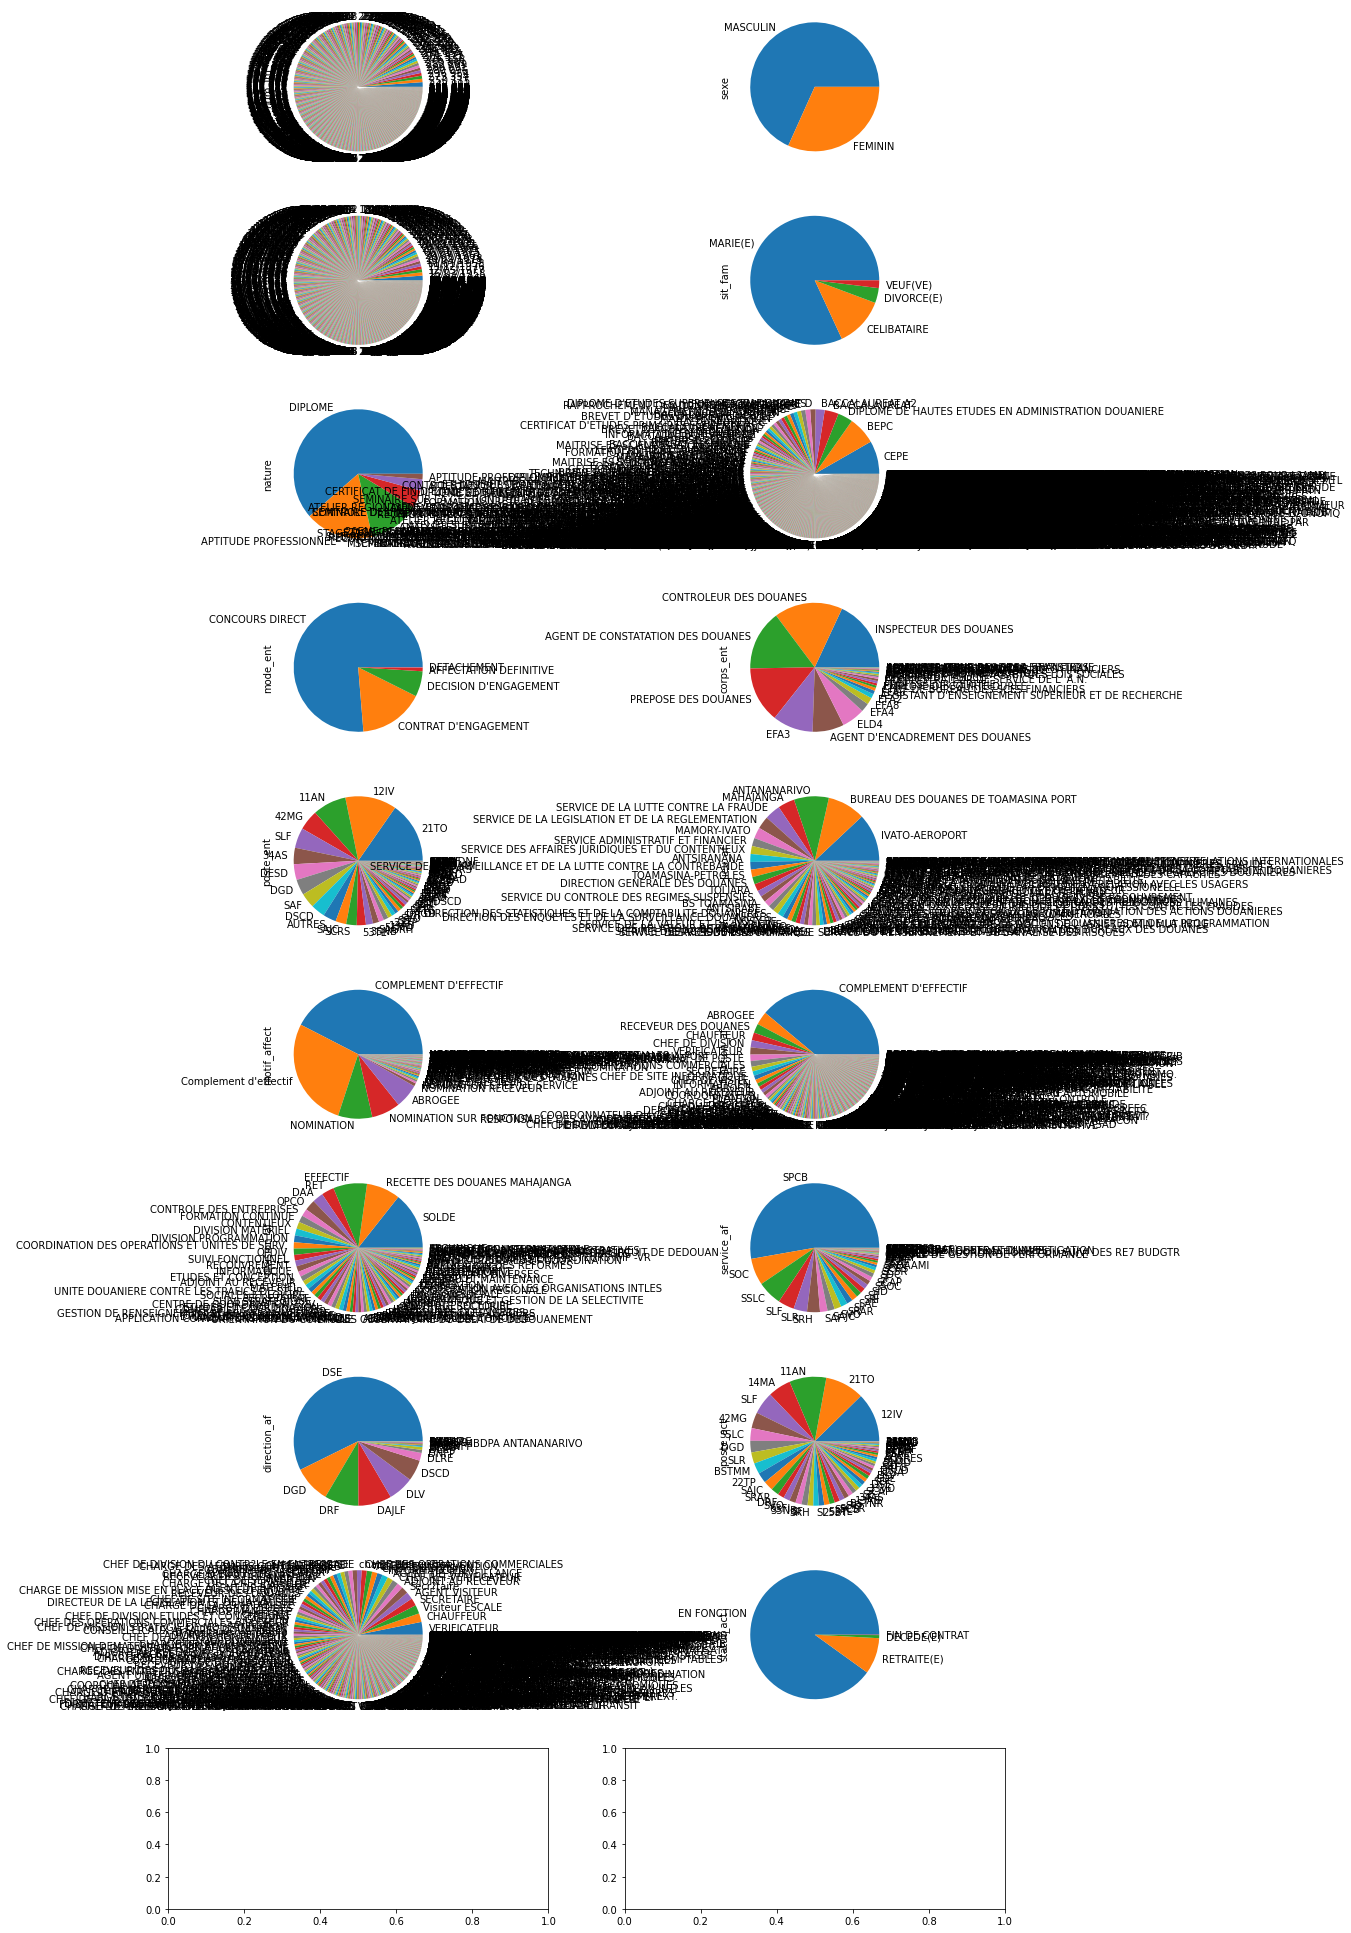

In [95]:
nb_line = int(len(qualitative)/2) +1

nb_column = 2
f, axes = plt.subplots(nb_line, nb_column, figsize=(15, 35), sharex=False)

i,j =0, 0
for col in qualitative :
    if j == 2:
        j = 0
        i = i+1
    df[col].value_counts().plot.pie(ax=axes[i, j])

    j=j+1

In [103]:
def diagramme_2_categorielle(val1,val2):   
    area2=val1+"_"
    workout_type2 = val2[:13]+"_"
    
    top6 = list(df[val1].value_counts().index[:5])
    df[area2] = df[val1]

    msk = df[area2].isin(top6)
    df.loc[~msk, area2] = 'Other'

    top4 = list(df[val2].value_counts().index[:3])
    df[workout_type2] = df[val2]

    msk = df[workout_type2].isin(top4)
    df.loc[~msk, workout_type2] = 'Other'

    order = df[area2].value_counts().index # order the columns from highest count to lowest.
    sns.catplot(x=workout_type2,
                col=area2,
                col_order=order,
                kind="count", data=df,aspect=0.5)

### Diagramme à barres: deux variables catégoriques

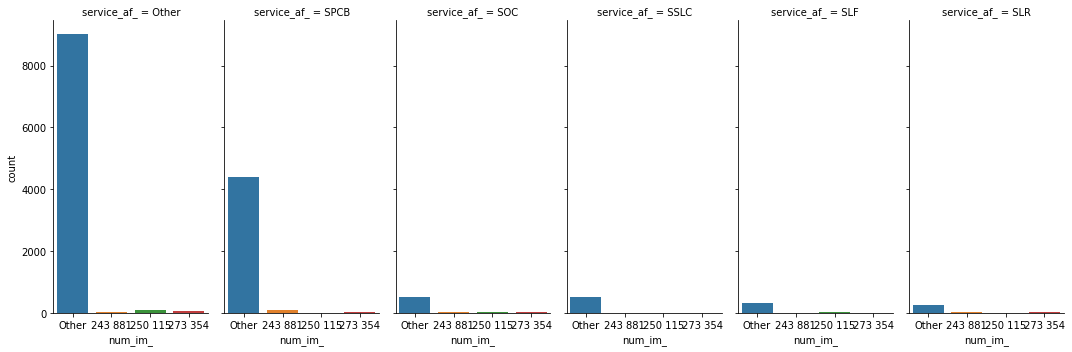

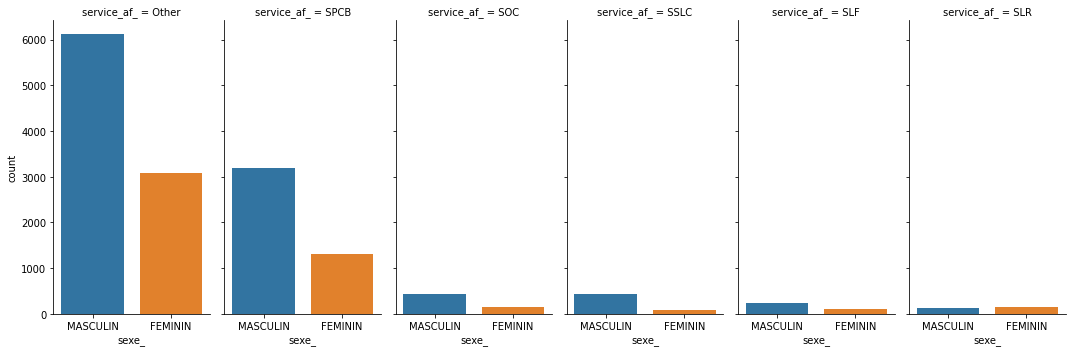

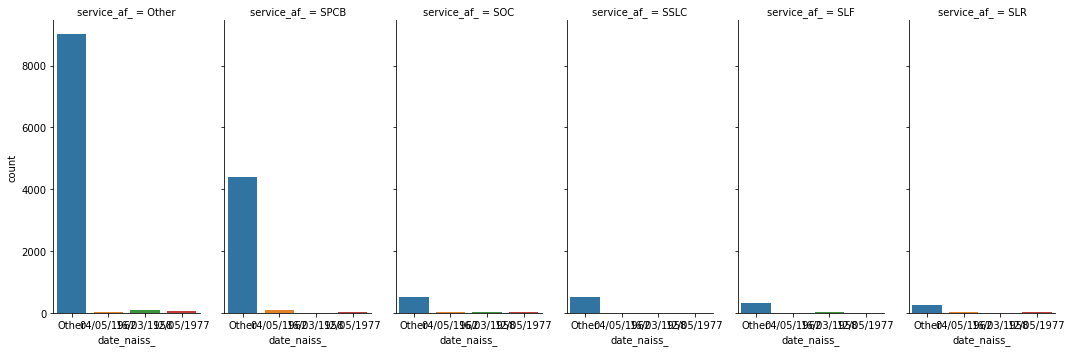

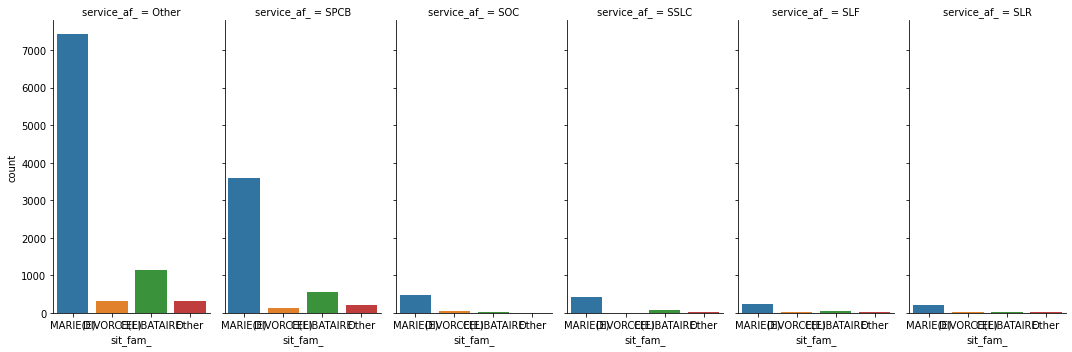

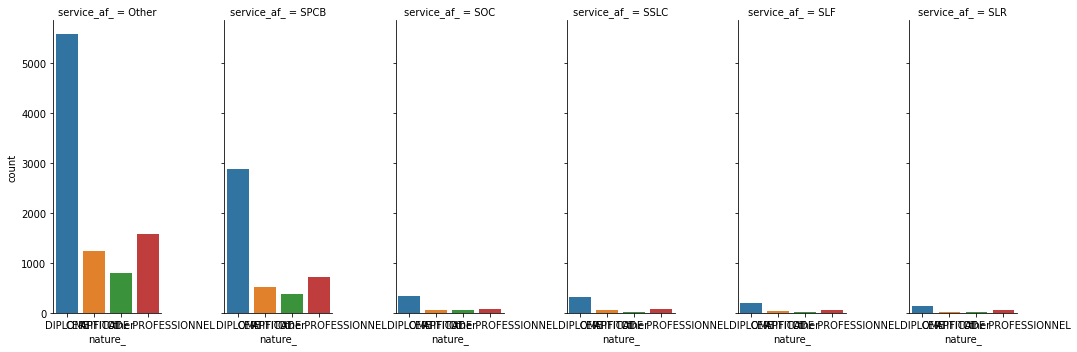

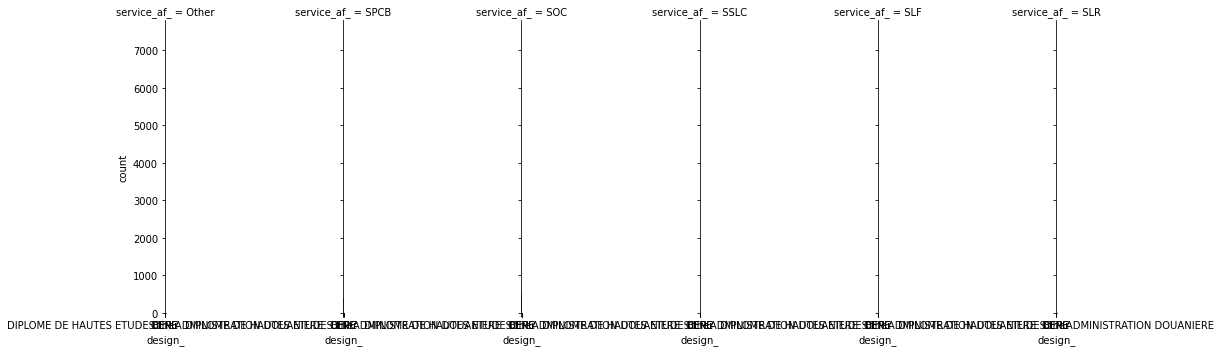

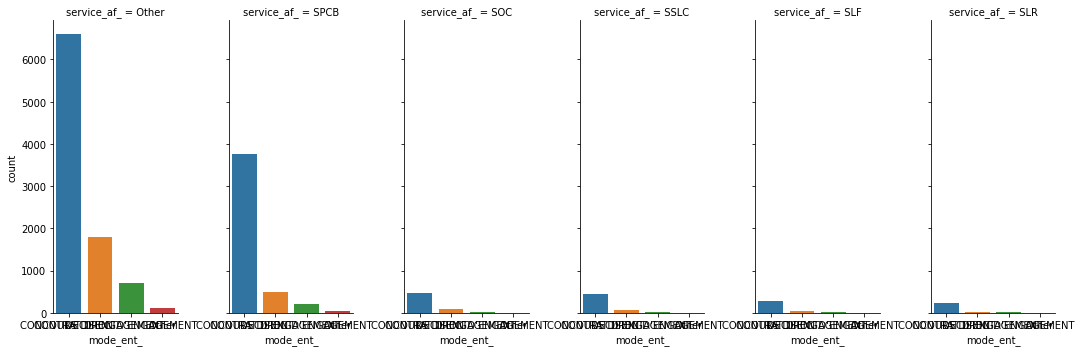

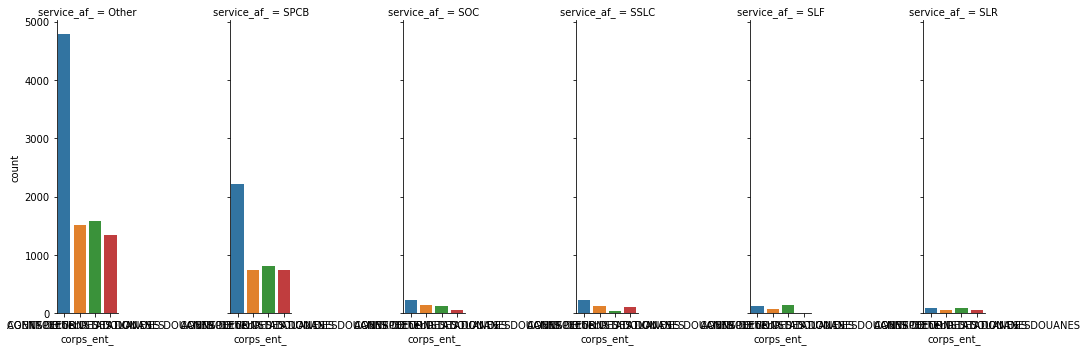

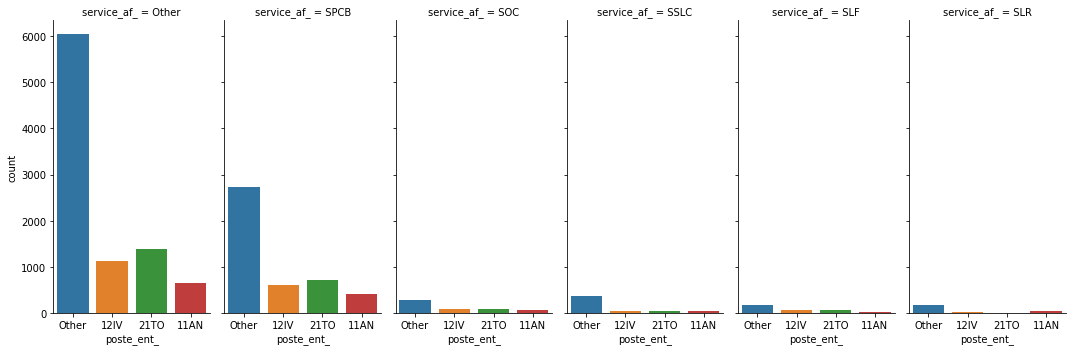

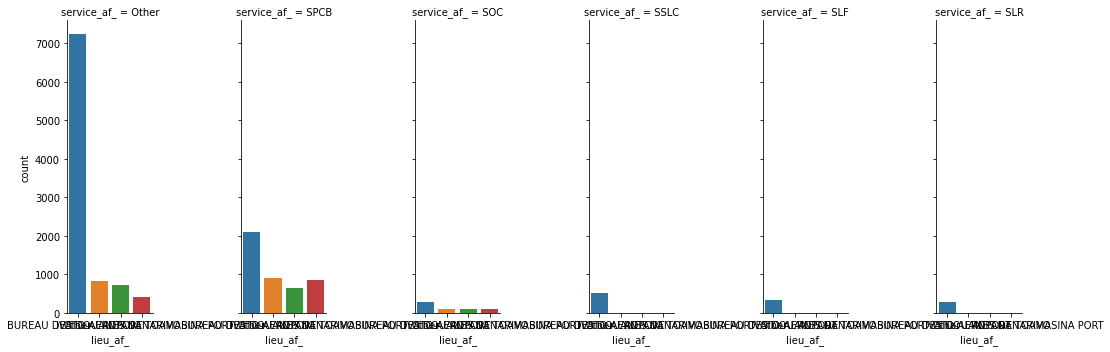

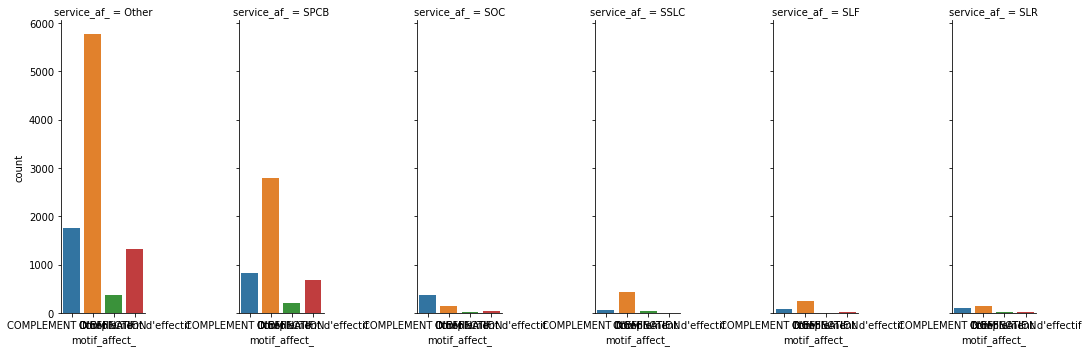

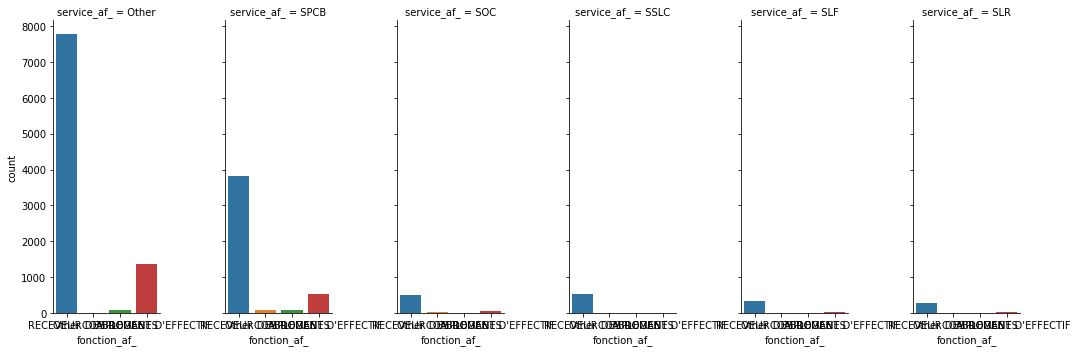

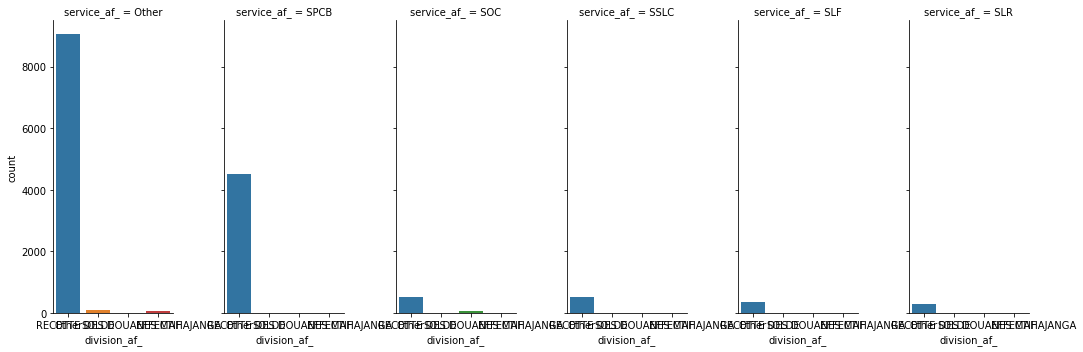

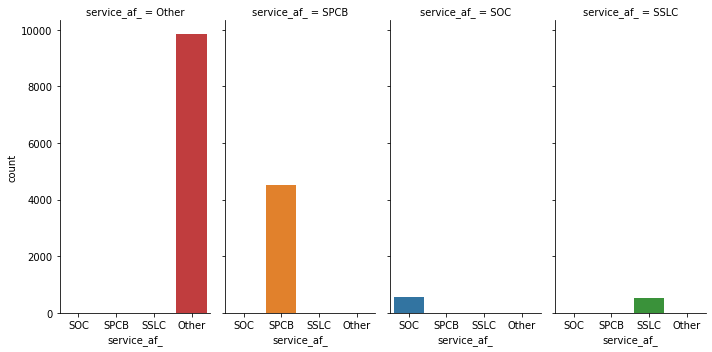

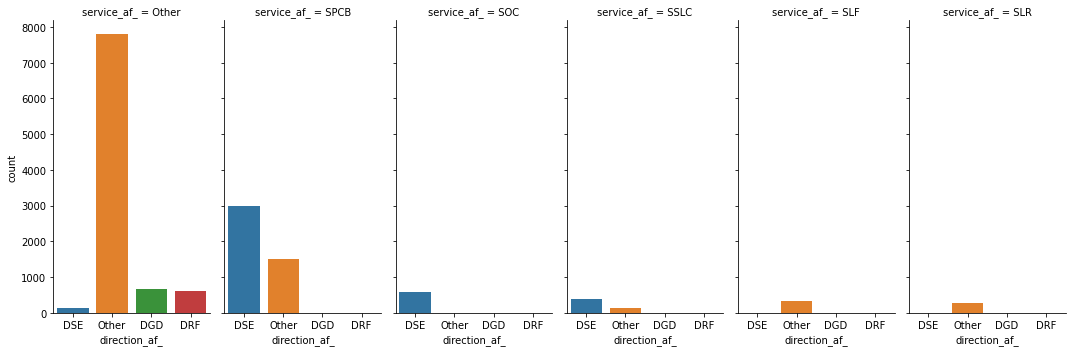

In [ ]:
for i in range(len(qualitative)):
    diagramme_2_categorielle(qualitative[13],qualitative[i])

### Boxplot: Variables numériques et catégorielles

<AxesSubplot:xlabel='service_af', ylabel='age'>

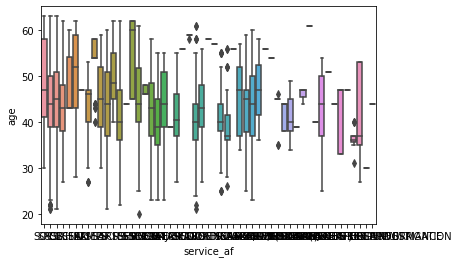

In [110]:
sns.boxplot(x=qualitative[13], y=quantitative[0], data=df)

<AxesSubplot:xlabel='service_af', ylabel='job_ok'>

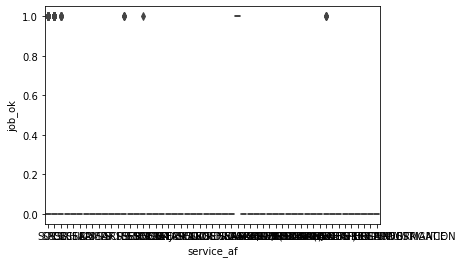

In [111]:
sns.boxplot(x=qualitative[13], y=quantitative[1], data=df)

<AxesSubplot:xlabel='service_af', ylabel='ann_dipl'>

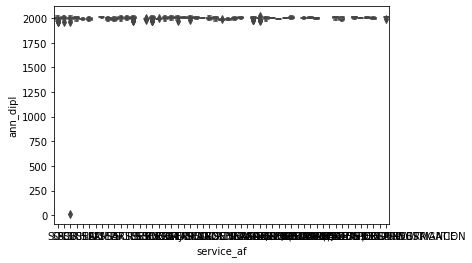

In [112]:
sns.boxplot(x=qualitative[13], y=quantitative[3], data=df)

<AxesSubplot:xlabel='service_af', ylabel='ordre'>

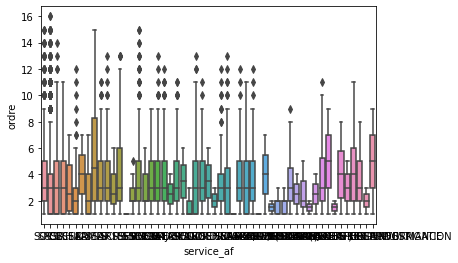

In [113]:
sns.boxplot(x=qualitative[13], y=quantitative[4], data=df)

<AxesSubplot:xlabel='service_af', ylabel='annee_ent'>

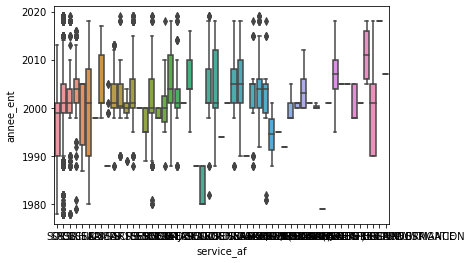

In [114]:
sns.boxplot(x=qualitative[13], y=quantitative[5], data=df)

<AxesSubplot:xlabel='service_af', ylabel='date_ent'>

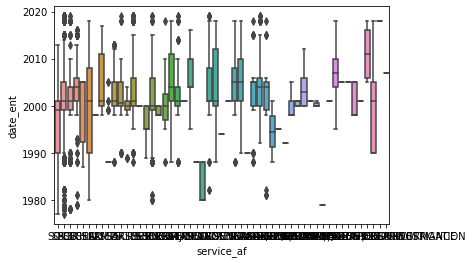

In [115]:
sns.boxplot(x=qualitative[13], y=quantitative[6], data=df)

<AxesSubplot:xlabel='service_af', ylabel='date_ps'>

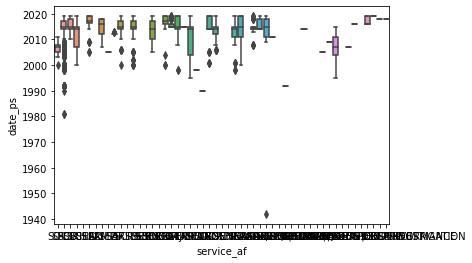

In [122]:
sns.boxplot(x=qualitative[13], y=quantitative[7], data=df)

<AxesSubplot:xlabel='service_af', ylabel='dat_retraite'>

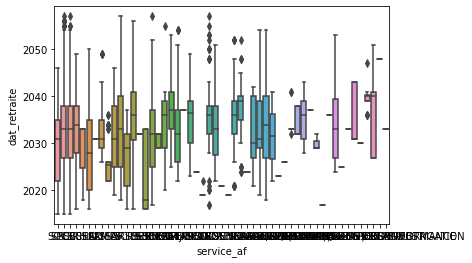

In [117]:
sns.boxplot(x=qualitative[13], y=quantitative[8], data=df)

<AxesSubplot:xlabel='service_af', ylabel='dt_echeance'>

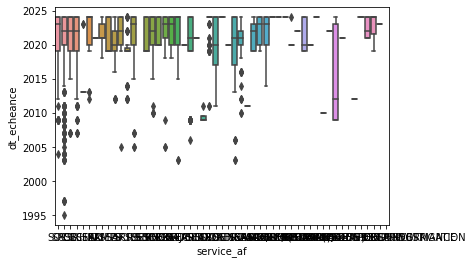

In [118]:
sns.boxplot(x=qualitative[13], y=quantitative[9], data=df)

<AxesSubplot:xlabel='service_af', ylabel='tot_afct'>

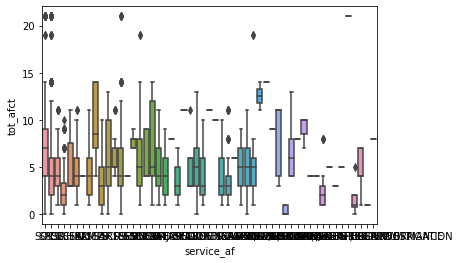

In [119]:
sns.boxplot(x=qualitative[13], y=quantitative[10], data=df)

### Table de contingence

In [67]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[0]],  
                               margins = False) 
data_crosstab

num_im                    141 854  154 420  162 773  167 751  168 846  \
direction_af                                                            
DAAD                            0        0        0        0        0   
DAGD                            0        0        0        0        0   
DAJLF                           0        0        0        0        0   
DCI                             0        0        0        0        0   
DESD                            0        0        0        0        0   
DGD                             0        0        0        0        0   
DISCD                           0        0        0        0        0   
DLR                             0        0        0        0        0   
DLRE                            0        0        0        0        0   
DLV                             0        0        0        0        0   
DNFP                            0        0        0        0        0   
DRF                             0        0        6        0        0   
DSCD                            0        0        0        0        0   
DSE                            56        2        6        2        7   
DTERD                           0        0        0        0        0   
DVL                             0        0        0        0        0   
EX-DLRE                         0        0        0        0        0   
EX-DNFP                         0        0        0        0        0   
MFB/SG                          0        0        0        0        0   
SG DU MBDPA ANTANANARIVO        0        0        0        0        0   
SPCB                            0        0        0        0        0   
SVO                             0        0        0        0        0   

num_im                    176 885  183 349  185 121  185 147  185 440  ...  \
direction_af                                                           ...   
DAAD                            0        8        0        0        0  ...   
DAGD                            0        0        0        0        0  ...   
DAJLF                           0        0        0        0        0  ...   
DCI                             0        0        0        0        0  ...   
DESD                            0        0        0        0        0  ...   
DGD                             0        0        0        0        0  ...   
DISCD                           0        0        0        0        0  ...   
DLR                             0        0        0        0        0  ...   
DLRE                            0        0        0        0        0  ...   
DLV                             0        0        0        0        0  ...   
DNFP                            0        8        0        0        0  ...   
DRF                             4        8        0        3        0  ...   
DSCD                            0        0        0        0        0  ...   
DSE                             4        8        0        0        6  ...   
DTERD                           0        0        0        0        0  ...   
DVL                             0        0        0        0        0  ...   
EX-DLRE                         0        0        2        0        0  ...   
EX-DNFP                         0        0        0        0        0  ...   
MFB/SG                          0        0        0        0        0  ...   
SG DU MBDPA ANTANANARIVO        0        0        0        0        0  ...   
SPCB                            0        0        0        0        0  ...   
SVO                             0        0        0        0        0  ...   

num_im                    424 359  433 884  433 885  433 886  433 887  \
direction_af                                                            
DAAD                            0        0        0        0        0   
DAGD                            0        0        0        0        0   
DAJLF                           0        0        0        0        2   
DCI      

In [68]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[2]],  
                               margins = True) 
data_crosstab

date_naiss                01/01/1958  01/01/1959  01/01/1962  01/01/1966  \
direction_af                                                               
DAAD                               0           0           0           0   
DAGD                               0           0           0           0   
DAJLF                              0           0          14           0   
DCI                                0           0           0           0   
DESD                               0           0           0           0   
DGD                               12           0           0           0   
DISCD                              0           0           0           0   
DLR                               12           0           0           0   
DLRE                               0           0           0           0   
DLV                                0           0           7           0   
DNFP                               0           0           0           0   
DRF                                0           0           7           0   
DSCD                               0           0           0           0   
DSE                               36           6           0           2   
DTERD                              0           0           0           0   
DVL                                0           0           0           0   
EX-DLRE                            0           0           0           0   
EX-DNFP                            0           0           0           0   
MFB/SG                             0           0           0           0   
SG DU MBDPA ANTANANARIVO           0           0           0           0   
SPCB                               0           0           0           0   
SVO                                0           0           0           0   
All                               60           6          28           2   

date_naiss                01/01/1978  01/01/1981  01/01/1983  01/02/1968  \
direction_af                                                               
DAAD                               0           0           0           0   
DAGD                               0           0           0           0   
DAJLF                              0           0           0           0   
DCI                                0           0           0           0   
DESD                               0           0           0           0   
DGD                                0           0           0           3   
DISCD                              0           0           0           0   
DLR                                0           0           0           0   
DLRE                               0           0           0           0   
DLV                                0           0           0           0   
DNFP                               0           0           0           0   
DRF                                0           8           0           0   
DSCD                               1           0           0           0   
DSE                                0           8           3           6   
DTERD                              0           0           0           0   
DVL                                0           0           0           0   
EX-DLRE                            0           0           0           0   
EX-DNFP                            0           0           0           0   
MFB/SG                             0           0           0           0   
SG DU MBDPA ANTANANARIVO           0           0           0           0   
SPCB                               0           0           0           0   
SVO                                0           0           0           0   
All                                1          16           3           9   

date_naiss                01/02/1981  01/02/1983  ...  31/07/1975  31/08/1975  \
direction_af                                      ...                           
DAAD                               0

In [69]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[3]],  
                               margins = True) 
data_crosstab

sit_fam                   CELIBATAIRE  DIVORCE(E)  MARIE(E)  VEUF(VE)   All
direction_af                                                               
DAAD                                0           0        10         0    10
DAGD                                0           0         5         0     5
DAJLF                             102          20       415         0   537
DCI                                 0           0         9         0     9
DESD                                0           7         9         0    16
DGD                                71          14       546         5   636
DISCD                               0          10         3         0    13
DLR                                 0           0        52         0    52
DLRE                                8          30        91         0   129
DLV                                36          20       355        14   425
DNFP                                3           0        51         0    54
DRF                                94           3       468        31   596
DSCD                               70          22       283         0   375
DSE                               482         150      3267        70  3969
DTERD                               0           0         1         0     1
DVL                                 0           0         2         0     2
EX-DLRE                             0           0         2         0     2
EX-DNFP                             8           0         6         0    14
MFB/SG                              0           0         6         0     6
SG DU MBDPA ANTANANARIVO            0           7         0         0     7
SPCB                                0           0        13         0    13
SVO                                 0           0         5         0     5
All                               874         283      5599       120  6876

In [70]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[4]],  
                               margins = True) 
data_crosstab

nature                    APTITUDE PROFESSIONNEL  APTITUDE PROFESSIONNELLE  \
direction_af                                                                 
DAAD                                           1                         0   
DAGD                                           0                         0   
DAJLF                                        102                         6   
DCI                                            4                         0   
DESD                                           5                         0   
DGD                                           94                        53   
DISCD                                          2                         0   
DLR                                           10                         8   
DLRE                                          51                         2   
DLV                                           71                         2   
DNFP                                           9                         0   
DRF                                          124                         1   
DSCD                                          72                         5   
DSE                                          646                        38   
DTERD                                          0                         0   
DVL                                            0                         0   
EX-DLRE                                        0                         0   
EX-DNFP                                        1                         0   
MFB/SG                                         1                         0   
SG DU MBDPA ANTANANARIVO                       2                         0   
SPCB                                           5                         0   
SVO                                            2                         0   
All                                         1202                       115   

nature                    ATTESTATION  CERTIFICAT  DIPLOME  FORMATION   All  
direction_af                                                                 
DAAD                                0           4        5          0    10  
DAGD                                0           3        2          0     5  
DAJLF                              11          79      372         26   596  
DCI                                 1           0        3          1     9  
DESD                                0           2        9          0    16  
DGD                                16          65      386         45   659  
DISCD                               1           1        9          0    13  
DLR                                 0           7       24          3    52  
DLRE                                2           9       58         18   140  
DLV                                31          44      283         29   460  
DNFP                                4           8       33          0    54  
DRF                                20         106      333         25   609  
DSCD                               13          58      199         29   376  
DSE                               111         438     2636        224  4093  
DTERD                               0           0        1          0     1  
DVL                                 0           0        2          0     2  
EX-DLRE                             1           0        1          0     2  
EX-DNFP                             0           7        6          0    14  
MFB/SG                              0           1        4          0     6  
SG DU MBDPA ANTANANARIVO            0           1        4          0     7  
SPCB                                0           1        5          2    13  
SVO                                 0           0        2          1     5  
All                               211         834     4377        403  7142

In [71]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[5]],  
                               margins = True) 
data_crosstab

design                    123EME ET 124EME SESSIONS DU CONSEIL DE COOPERATION DOUANIERE  \
direction_af                                                                              
DAAD                                                                      0               
DAGD                                                                      0               
DAJLF                                                                     0               
DCI                                                                       0               
DESD                                                                      0               
DGD                                                                       3               
DISCD                                                                     0               
DLR                                                                       0               
DLRE                                                                      1               
DLV                                                                       0               
DNFP                                                                      0               
DRF                                                                       0               
DSCD                                                                      0               
DSE                                                                       4               
DTERD                                                                     0               
DVL                                                                       0               
EX-DLRE                                                                   0               
EX-DNFP                                                                   0               
MFB/SG                                                                    0               
SG DU MBDPA ANTANANARIVO                                                  0               
SPCB                                                                      0               
SVO                                                                       0               
All                                                                       8               

design                    125EME/126EME SESSION DU CONSEIL DE COOPERATION DOUANIERE  \
direction_af                                                                          
DAAD                                                                      0           
DAGD                                                                      0           
DAJLF                                                                     0           
DCI                                                                       0           
DESD                                                                      0           
DGD                                                                       4           
DISCD                                                                     0           
DLR                                                                       0           
DLRE                                                                      1           
DLV                                                                       0           
DNFP                                                                      0           
DRF                                                                       0           
DSCD                                                                      2           
DSE                                                                       0           
DTERD                                                                     0           
DVL                                                                       0           
EX-DLRE                                                                   0           
EX-DNFP                                                                

In [72]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[6]],  
                               margins = True) 
data_crosstab

mode_ent                  AFFECTATION DEFINITIVE  CONCOURS DIRECT  \
direction_af                                                        
DAAD                                           8                0   
DAGD                                           1                0   
DAJLF                                          0              468   
DCI                                            0                0   
DESD                                           0               10   
DGD                                            0              419   
DISCD                                          0               10   
DLR                                            1               42   
DLRE                                           0              116   
DLV                                            0              336   
DNFP                                           8               39   
DRF                                           24              372   
DSCD                                          12              161   
DSE                                           53             3413   
DTERD                                          0                1   
DVL                                            0                2   
EX-DLRE                                        0                0   
EX-DNFP                                        0                0   
MFB/SG                                         0                6   
SG DU MBDPA ANTANANARIVO                       0                7   
SPCB                                           0               13   
SVO                                            0                0   
All                                          107             5415   

mode_ent                  CONTRAT D'ENGAGEMENT  DECISION D'ENGAGEMENT  \
direction_af                                                            
DAAD                                         2                      0   
DAGD                                         4                      0   
DAJLF                                       87                     40   
DCI                                          9                      0   
DESD                                         6                      0   
DGD                                        155                     78   
DISCD                                        3                      0   
DLR                                          7                      2   
DLRE                                        24                      0   
DLV                                         74                     49   
DNFP                                         7                      0   
DRF                                        147                     61   
DSCD                                       135                     68   
DSE                                        423                    203   
DTERD                                        0                      0   
DVL                                          0                      0   
EX-DLRE                                      2                      0   
EX-DNFP                                     14                      0   
MFB/SG                                       0                      0   
SG DU MBDPA ANTANANARIVO                     0                      0   
SPCB                                         0                      0   
SVO                                          5                      0   
All                                       1104                    501   

mode_ent                  DETACHEMENT   All  
direction_af                                 
DAAD                                0    10  
DAGD                                0     5  
DAJLF                               0   595  
DCI                                 0     9  
DESD                                0    16  
DGD                                 3   655  
DISCD                               0    13  
DLR                               

In [73]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[7]],  
                               margins = True) 
data_crosstab

corps_ent                 ADJOINT D'ADMINISTRATION  ADMINISTRATEUR CIVIL  \
direction_af                                                               
DAAD                                             0                     0   
DAGD                                             0                     0   
DAJLF                                            0                     0   
DCI                                              0                     0   
DESD                                             0                     0   
DGD                                              0                     0   
DISCD                                            0                     0   
DLR                                              4                     0   
DLRE                                             0                     0   
DLV                                              0                     0   
DNFP                                             0                     0   
DRF                                              3                     5   
DSCD                                             0                     0   
DSE                                             12                     0   
DTERD                                            0                     0   
DVL                                              0                     0   
EX-DLRE                                          0                     0   
EX-DNFP                                          0                     0   
MFB/SG                                           0                     0   
SG DU MBDPA ANTANANARIVO                         0                     0   
SPCB                                             0                     0   
SVO                                              0                     0   
All                                             19                     5   

corps_ent                 ADMINISTRATEUR D'UNIVERSITE  \
direction_af                                            
DAAD                                                0   
DAGD                                                0   
DAJLF                                               0   
DCI                                                 0   
DESD                                                0   
DGD                                                 0   
DISCD                                               0   
DLR                                                 0   
DLRE                                                0   
DLV                                                 0   
DNFP                                                0   
DRF                                                 7   
DSCD                                                0   
DSE                                                 0   
DTERD                                               0   
DVL                                                 0   
EX-DLRE                                             0   
EX-DNFP                                             0   
MFB/SG                                              0   
SG DU MBDPA ANTANANARIVO                            0   
SPCB                                                0   
SVO                                                 0   
All                                                 7   

corps_ent                 ADMINISTRATEUR DE SERVICE DE L' A.N.  \
direction_af                                                     
DAAD                                                         0   
DAGD                                                         0   
DAJLF                                                       12   
DCI                                                          0   
DESD                                                         0   
DGD                                                          0   
DISCD                                                        0   
DLR                                                          0   
DLRE         

In [74]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[8]],  
                               margins = True) 
data_crosstab

poste_ent                 11AN  12IV  13AB  14MA  15ZS  16ZE  17ZO  21TO  \
direction_af                                                               
DAAD                         0     0     0     0     0     0     0     0   
DAGD                         0     4     0     0     0     0     0     0   
DAJLF                       26    93     0     0     0     0     0   125   
DCI                          0     0     0     0     0     0     0     0   
DESD                         0    13     0     0     0     0     0     0   
DGD                         28    39     0     0     0     0     0    83   
DISCD                        0    10     0     0     0     0     0     0   
DLR                         15     0     0     0     0     0     0     2   
DLRE                        30    32     0     0     0     0     0    12   
DLV                         25    41     0     0     4     0     0    66   
DNFP                         0     6     0     0     0     0     0    19   
DRF                         21    32    12     0     0     1     0   114   
DSCD                        20    19     0     0     0     0     0    49   
DSE                        409   532    64     6    11    20    25   644   
DTERD                        0     0     0     0     0     0     0     0   
DVL                          0     0     0     0     0     0     0     2   
EX-DLRE                      2     0     0     0     0     0     0     0   
EX-DNFP                      0     0     0     0     0     0     0     0   
MFB/SG                       0     0     0     0     0     0     0     0   
SG DU MBDPA ANTANANARIVO     0     7     0     0     0     0     0     0   
SPCB                         0     9     0     0     0     0     0     4   
SVO                          5     0     0     0     0     0     0     0   
All                        581   837    76     6    15    21    25  1120   

poste_ent                 22TP  23MA  ...  SRDAAMI  SRH  SRI  SS  SSAE  SSLC  \
direction_af                          ...                                      
DAAD                         0     0  ...        0    0    0   0     0     0   
DAGD                         0     0  ...        0    0    0   0     0     0   
DAJLF                        4     0  ...        2    0    0  20     0     0   
DCI                          0     0  ...        0    0    0   0     0     0   
DESD                         0     0  ...        0    0    0   3     0     0   
DGD                          0     0  ...        0    9    7  23     0     0   
DISCD                        0     0  ...        0    0    0   3     0     0   
DLR                          1     0  ...        0    0    7   0     0     0   
DLRE                         0     0  ...        0    0    0   0     0     0   
DLV                         12     4  ...        2    8    2   0     0     0   
DNFP                         3     0  ...        0    0    0   0     0     0   
DRF                          6     0  ...        0   34   15   0     0     0   
DSCD                         8     0  ...        4    0    0  15    30     0   
DSE                         63     5  ...        0    6    8  24     3    45   
DTERD                        0     0  ...        0    0    0   0     0     0   
DVL                          0     0  ...        0    0    0   0     0     0   
EX-DLRE                      0     0  ...        0    0    0   0     0     0   
EX-DNFP                      0     0  ...        0    0    0   0     0     0   
MFB/SG                       0     0  ...        0    0    0   0     0     0   
SG DU MBDPA ANTANANARIVO     0     0  ...        0    0    0   0     0     0   
SPCB                         0     0  ...        0    0    0   0     0     0   
SVO                          0     0  ...        0    0    0   0     0     0   
All                         97     9  ...        8   57   39  88    33    45   

poste_ent                 SSOC  SST  SVO   All  
direction_af                                    


In [75]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[9]],  
                               margins = True) 
data_crosstab

lieu_af                   ANTALAHA  ANTANANARIVO  \
direction_af                                       
DAAD                             0             0   
DAGD                             0             0   
DAJLF                            0             0   
DCI                              0             0   
DESD                             0             0   
DGD                              0             0   
DISCD                            0             0   
DLR                              0             0   
DLRE                             0             0   
DLV                              0             0   
DNFP                             0             0   
DRF                              0            12   
DSCD                             0             0   
DSE                              9           615   
DTERD                            0             0   
DVL                              0             0   
EX-DLRE                          0             0   
EX-DNFP                          0             0   
MFB/SG                           0             0   
SG DU MBDPA ANTANANARIVO         0             0   
SPCB                             0             0   
SVO                              0             0   
All                              9           627   

lieu_af                   ANTENNE DES DOUANES ANOSISOA  \
direction_af                                             
DAAD                                                 0   
DAGD                                                 0   
DAJLF                                                0   
DCI                                                  0   
DESD                                                 0   
DGD                                                  0   
DISCD                                                0   
DLR                                                  0   
DLRE                                                 0   
DLV                                                  0   
DNFP                                                 0   
DRF                                                  0   
DSCD                                                 0   
DSE                                                  4   
DTERD                                                0   
DVL                                                  0   
EX-DLRE                                              0   
EX-DNFP                                              0   
MFB/SG                                               0   
SG DU MBDPA ANTANANARIVO                             0   
SPCB                                                 0   
SVO                                                  0   
All                                                  4   

lieu_af                   ANTENNE DES DOUANES ANOSIZATO  ANTSIRABE  \
direction_af                                                         
DAAD                                                  0          0   
DAGD                                                  0          0   
DAJLF                                                 0          0   
DCI                                                   0          0   
DESD                                                  0          0   
DGD                                                   0          0   
DISCD                                                 0          0   
DLR                                                   0          0   
DLRE                                                  0          0   
DLV                                                   0          0   
DNFP                                                  0          0   
DRF                                                   0         11   
DSCD                                                  0          0   
DSE                                                   3         68   
DTERD                                                 0          0   
DVL                                                   0   

In [76]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[10]],
                               margins = True)
data_crosstab

motif_affect              12IV ANNULE  1ERE AFFECTATION  1ERE POSTE  \
direction_af                                                          
DAGD                                0                 0           0   
DAJLF                               0                 0           0   
DCI                                 0                 0           0   
DESD                                0                 0           0   
DGD                                 2                 0           0   
DISCD                               0                 0           0   
DLR                                 0                 0           0   
DLRE                                0                 0           4   
DLV                                 0                 0           0   
DNFP                                0                 0           0   
DRF                                 0                 0           0   
DSCD                                0                 0           0   
DSE                                 0                 4           0   
DTERD                               0                 0           0   
DVL                                 0                 0           0   
MFB/SG                              0                 0           0   
SG DU MBDPA ANTANANARIVO            0                 0           0   
SPCB                                0                 0           0   
All                                 2                 4           4   

motif_affect              ABROGATION DRF  ABROGATION MAINTIEN 21TO  ABROGE  \
direction_af                                                                 
DAGD                                   0                         0       0   
DAJLF                                  0                         0       0   
DCI                                    0                         0       0   
DESD                                   0                         0       0   
DGD                                    0                         0       0   
DISCD                                  0                         0       0   
DLR                                    0                         0       0   
DLRE                                   0                         0       0   
DLV                                    0                         0       4   
DNFP                                   0                         0       0   
DRF                                    1                         0       0   
DSCD                                   0                         0       0   
DSE                                    0                         6      17   
DTERD                                  0                         0       0   
DVL                                    0                         0       0   
MFB/SG                                 0                         0       0   
SG DU MBDPA ANTANANARIVO               0                         0       0   
SPCB                                   0                         0       0   
All                                    1                         6      21   

motif_affect              ABROGEE  ABROGEE SUIVANT DEC 007 DU 08/02/17  CE  \
direction_af                                                                 
DAGD                            0                                    0   0   
DAJLF                          26                                    0   5   
DCI                             0                                    0   0   
DESD                            0                                    0   0   
DGD                            18                                    0   0   
DISCD                           0                                    0   0   
DLR                             0                                    0   0   
DLRE                           11                                    0   7   
DLV                             9                                    0   0   
DNFP       

In [77]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[11]],  
                               margins = True) 
data_crosstab

fonction_af               ABROGE  ABROGEE  ADJOINT AU RECEVEUR  \
direction_af                                                     
DAJLF                          0       13                    0   
DCI                            0        0                    0   
DGD                            0        1                    0   
DISCD                          0        0                    0   
DLR                            0        0                    0   
DLRE                           0        0                    0   
DLV                            4        4                    0   
DNFP                           0        0                    0   
DRF                            0        0                    0   
DSCD                           0        4                    0   
DSE                           25       24                   34   
DVL                            0        0                    0   
SG DU MBDPA ANTANANARIVO       0        0                    0   
SPCB                           0        0                    0   
SVO                            0        0                    0   
All                           29       46                   34   

fonction_af               ADJOINT AU RECEVEUR 11AN  ADJOINT AU RECEVEUR 12IV  \
direction_af                                                                   
DAJLF                                            0                         0   
DCI                                              0                         0   
DGD                                              0                         0   
DISCD                                            0                         0   
DLR                                              0                         0   
DLRE                                             0                         0   
DLV                                              0                         0   
DNFP                                             0                         0   
DRF                                              0                         0   
DSCD                                             0                         0   
DSE                                              2                         3   
DVL                                              0                         0   
SG DU MBDPA ANTANANARIVO                         0                         0   
SPCB                                             0                         0   
SVO                                              0                         0   
All                                              2                         3   

fonction_af               ADJOINT AU RECEVEUR 34AS  \
direction_af                                         
DAJLF                                            0   
DCI                                              0   
DGD                                              0   
DISCD                                            0   
DLR                                              0   
DLRE                                             0   
DLV                                              0   
DNFP                                             0   
DRF                                              0   
DSCD                                             0   
DSE                                              7   
DVL                                              0   
SG DU MBDPA ANTANANARIVO                         0   
SPCB                                             0   
SVO                                              0   
All                                              7   

fonction_af               ADJOINT AU RECEVEUR DES DOUANES  \
direction_af                                                
DAJLF                                                   0   
DCI                                                     0   
DGD                                                     0   
DISCD                                                   0   
DLR                            

In [78]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[12]],  
                               margins = True) 
data_crosstab

division_af               ADJOINT AU RECEVEUR  AFFAIRES JURIDIQUES  \
direction_af                                                         
DAJLF                                       0                    5   
DGD                                         0                    0   
DLV                                         0                    0   
DRF                                         0                    0   
DSCD                                        0                    0   
DSE                                         9                    0   
DVL                                         0                    0   
SG DU MBDPA ANTANANARIVO                    0                    0   
SPCB                                        0                    0   
SVO                                         0                    0   
All                                         9                    5   

division_af               APPLICATION CONVENTIONS INTERNATIONALES  \
direction_af                                                        
DAJLF                                                           0   
DGD                                                             0   
DLV                                                             0   
DRF                                                             0   
DSCD                                                            0   
DSE                                                             0   
DVL                                                             0   
SG DU MBDPA ANTANANARIVO                                        0   
SPCB                                                            0   
SVO                                                             5   
All                                                             5   

division_af               APPLICATION DES REFORMES  APPUI  AUDIT  \
direction_af                                                       
DAJLF                                            0      2      0   
DGD                                              0      0      3   
DLV                                              2      0      0   
DRF                                              0      0      0   
DSCD                                             0      2      0   
DSE                                              0      0      0   
DVL                                              0      0      0   
SG DU MBDPA ANTANANARIVO                         0      0      0   
SPCB                                             0      0      0   
SVO                                              0      0      0   
All                                              2      4      3   

division_af               AUDIT ET PROCEDURE  BRIGADE  BRIGADE/OPCO  BSTMM  \
direction_af                                                                 
DAJLF                                      0        0             0      0   
DGD                                        0        0             0      0   
DLV                                        0        0             0      0   
DRF                                        0        0             0      0   
DSCD                                       0        0             0      0   
DSE                                        4        1             3      3   
DVL                                        0        0             0      0   
SG DU MBDPA ANTANANARIVO                   0        0             0      0   
SPCB                                       0        0             0      0   
SVO                                        0        0             0      0   
All                                        4        1             3      3   

division_af               ...  SUIVI STRATEGIQUE  TARIF  TECHNIQUE  \
direction_af              ...                                        
DAJLF                     ...                  0      0          0   
DGD                       ...                  7      0          0   
DLV        

In [79]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[14]],
                               margins = True) 
data_crosstab


service_af                CCSEAD  CDL  CELLULE DE GESTION DE PERFORMANCE  CGP  \
direction_af                                                                    
DAGD                           0    0                                  0    0   
DAJLF                          0    0                                  0    0   
DCI                            0    0                                  0    0   
DESD                           0    0                                  0    0   
DGD                           10   21                                 14    3   
DLR                            0    0                                  0    0   
DLRE                           0    0                                  0    0   
DLV                            0    0                                  0    0   
DNFP                           0    0                                  0    0   
DRF                            0    0                                  0    0   
DSCD                           0    0                                  0    0   
DSE                            0    0                                  0    0   
DTERD                          0    0                                  0    0   
DVL                            0    0                                  0    0   
MFB/SG                         0    0                                  0    0   
SG DU MBDPA ANTANANARIVO       0    0                                  0    0   
SPCB                           0    0                                  0    0   
SVO                            0    0                                  0    0   
All                           10   21                                 14    3   

service_af                CPERF  ENSD  EXTERIEUR  PRMP  SAE  SAF  ...  \
direction_af                                                      ...   
DAGD                          0     0          0     0    0    0  ...   
DAJLF                         0     0          0     0    0    0  ...   
DCI                           0     0          0     0    0    0  ...   
DESD                          0     0          0     0    0    0  ...   
DGD                          28     0          4    30    0   64  ...   
DLR                           0     0          0     0    0    0  ...   
DLRE                          0     0          0     0   17    0  ...   
DLV                           0     0          0     0   90    0  ...   
DNFP                          0     9          0     0    0    0  ...   
DRF                           0     0          0     0    0    0  ...   
DSCD                          0     0          0     0    0    0  ...   
DSE                           0     0          0     0    0    0  ...   
DTERD                         0     0          0     0    0    0  ...   
DVL                           0     0          0     0    0    0  ...   
MFB/SG                        0     0          0     0    0    0  ...   
SG DU MBDPA ANTANANARIVO      0     0          0     0    0    0  ...   
SPCB                          0     0          0     0    0    0  ...   
SVO                           0     0          0     0    5    0  ...   
All                          28     9          4    30  112   64  ...   

service_af                SRH (EX-SAF)  SRI  SSAE  SSC  SSD  SSFRC  SSLC  \
direction_af                                                               
DAGD                                 0    0     0    0    0      0     0   
DAJLF                                0    0     0    0    0      0     0   
DCI                                  0    0     0    0    0      0     0   
DESD                                 0    0     0    0    0      0     0   
DGD                                  0    0     0    0    0      0     0   
DLR                                  0    8     0    0    0      0     0   
DLRE                                 0   27     0    0    0      0     0   
DLV                                  0   60     0    0    0      0     0   
DNFP

In [104]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[15]],
                               margins = True) 
data_crosstab

poste_act                                           11AN  12IV  13AB  14MA  \
service_af                                                                   
CCSEAD                                                 0     0     0     0   
CDL                                                    0     0     0     0   
CELLULE DE GESTION DE PERFORMANCE                      0     0     0     0   
CGP                                                    0     0     0     0   
CPERF                                                  0     0     0     0   
ENSD                                                   0     0     0     0   
EX-SAF                                                 0     0     0     0   
EX-SST                                                 0     0     0     0   
EXTERIEUR                                              0     0     0     0   
PRMP                                                  12     0     0     0   
SAE                                                    0    23     0     0   
SAF                                                   21    11     0    10   
SAF/DNFP                                               0     0     0     1   
SAGD                                                   0     0     0     0   
SAI                                                    0     0     0     0   
SAJC                                                   0     3     0     7   
SCAP                                                   0     0     0     3   
SCAP (EX-SAF)                                          0     0     0     0   
SCC                                                    0     0     6     0   
SCE APPUI                                              0     0     0     0   
SCOLARITE                                              0     0     0     0   
SCRS                                                   0     2     0     0   
SCRU                                                   0     0     0     0   
SCSR                                                   0     0     0     0   
SDC                                                    5     0     0     0   
SDI                                                    0     3     0     0   
SE                                                    18    13     0     0   
SE/DSCD                                                0     0     0     2   
SECRETARIAT GENERAL DU MFB                             0     0     0     0   
SED                                                    0     0     0     0   
SERVICE D'ENQUETE ET D'INVESTIGATION                   5     0     0     0   
SERVICE DE COORDINATION ET DU SUIVI DES RE7 BUDGTR     0     0     0     0   
SF                                                     8     1     0     0   
SI                                                     0     9     0    18   
SID                                                    2     0     0     0   
SLF                                                   18     5     0     8   
SLR                                                    3     0     6     7   
SOC                                                   34    43     6    18   
SPCB                                                 557   809    79   372   
SRAR                                                  11     4     0     8   
SRDAAMI                                                2     0     0     0   
SRH                                                    8     7     7    19   
SRH (EX-SAF)                                           0     3     0     2   
SRI                                                    4     1     0     1   
SS                                                     2     0     0     0   
SSAE                                                   0     3     0     0   
SSC                                                    0     0     0     0   
SSD                                                    0     0     0     0   
SSFRC                                                  0     0     0     0   
SSLC                  

In [105]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[16]],
                               margins = True)
data_crosstab

job_act                                               \
service_af                                              
CCSEAD                                              0   
CDL                                                 0   
CELLULE DE GESTION DE PERFORMANCE                   0   
CGP                                                 0   
CPERF                                               0   
ENSD                                                0   
EX-SAF                                              0   
EX-SST                                              0   
EXTERIEUR                                           0   
PRMP                                                0   
SAE                                                 0   
SAF                                                 0   
SAF/DNFP                                            0   
SAGD                                                0   
SAI                                                 0   
SAJC                                                0   
SCAP                                                0   
SCAP (EX-SAF)                                       0   
SCC                                                 0   
SCE APPUI                                           0   
SCOLARITE                                           0   
SCRS                                                0   
SCRU                                                0   
SCSR                                                0   
SDC                                                 0   
SDI                                                 0   
SE                                                  0   
SE/DSCD                                             0   
SECRETARIAT GENERAL DU MFB                          0   
SED                                                 0   
SERVICE D'ENQUETE ET D'INVESTIGATION                0   
SERVICE DE COORDINATION ET DU SUIVI DES RE7 BUDGTR  0   
SF                                                  0   
SI                                                  0   
SID                                                 0   
SLF                                                 0   
SLR                                                 0   
SOC                                                 0   
SPCB                                                9   
SRAR                                                0   
SRDAAMI                                             0   
SRH                                                 0   
SRH (EX-SAF)                                        0   
SRI                                                 0   
SS                                                  0   
SSAE                                                0   
SSC                                                 0   
SSFRC                                               0   
SSLC                                                0   
SSOC                                                0   
SST                                                 0   
SVO                                                 0   
All                                                 9   

job_act                                             2EME ADJOINT CHEF SECTEUR BSTMM  \
service_af                                                                            
CCSEAD                                                                            0   
CDL                                                                               0   
CELLULE DE GESTION DE PERFORMANCE                                                 0   
CGP                                                                               0   
CPERF                                                                             0   
ENSD                                                                              0   
EX-SAF                                                                            0   
EX-SST                                                                           

In [106]:
data_crosstab = pd.crosstab(df[qualitative[13]],
                            df[qualitative[17]],
                               margins = True)
data_crosstab

statut_act                                          DECEDE(E)  EN FONCTION  \
service_af                                                                   
CCSEAD                                                      0            8   
CDL                                                         0           21   
CELLULE DE GESTION DE PERFORMANCE                           0           14   
CGP                                                         0            3   
CPERF                                                       0           28   
ENSD                                                        0            9   
EX-SAF                                                      0            0   
EX-SST                                                      0            2   
EXTERIEUR                                                   0            4   
PRMP                                                        0           37   
SAE                                                         0          125   
SAF                                                         0          146   
SAF/DNFP                                                    0            2   
SAGD                                                        0            1   
SAI                                                         0            7   
SAJC                                                        0          151   
SCAP                                                        0           91   
SCAP (EX-SAF)                                               0            4   
SCC                                                         0            6   
SCE APPUI                                                   0            9   
SCOLARITE                                                   0            4   
SCRS                                                        0           42   
SCRU                                                        0            7   
SCSR                                                        0           65   
SDC                                                         0           69   
SDI                                                         0            1   
SE                                                          0          113   
SE/DSCD                                                     0            9   
SECRETARIAT GENERAL DU MFB                                  0            6   
SED                                                         0           40   
SERVICE D'ENQUETE ET D'INVESTIGATION                        0            5   
SERVICE DE COORDINATION ET DU SUIVI DES RE7 BUDGTR          0            7   
SF                                                          0           77   
SI                                                          0          128   
SID                                                         0           78   
SLF                                                         0          304   
SLR                                                         0          252   
SOC                                                         0          438   
SPCB                                                       29         4079   
SRAR                                                        0          128   
SRDAAMI                                                     0           47   
SRH                                                         2          256   
SRH (EX-SAF)                                                0            5   
SRI                                                         0           99   
SS                                                          0            2   
SSAE                                                        0           44   
SSC                                                         0            5   
SSD                                                         0            1   
SSFRC                                                       0            0   
SSLC                  

### Khi II

In [107]:
from scipy.stats import chi2_contingency

def get_dependancy(df, columns):
    df_result = pd.DataFrame()
    for col1 in range(0, len(columns)):
        for col2 in range(col1+1, len(columns)):
            crosstab = pd.crosstab(df[columns[col1]], df[columns[col2]])
            p_value = chi2_contingency(crosstab)[1]
            df_result = df_result.append({"column1": columns[col1], "column2": columns[col2], "p_value":p_value}, ignore_index=True)
    return df_result

In [108]:
get_dependancy(df,qualitative)

column1       column2        p_value
0          num_im          sexe   0.000000e+00
1          num_im    date_naiss   0.000000e+00
2          num_im       sit_fam   0.000000e+00
3          num_im        nature   0.000000e+00
4          num_im        design   0.000000e+00
5          num_im      mode_ent   0.000000e+00
6          num_im     corps_ent   0.000000e+00
7          num_im     poste_ent   0.000000e+00
8          num_im       lieu_af   0.000000e+00
9          num_im  motif_affect   0.000000e+00
10         num_im   fonction_af   0.000000e+00
11         num_im   division_af   0.000000e+00
12         num_im    service_af   0.000000e+00
13         num_im  direction_af   0.000000e+00
14         num_im     poste_act   0.000000e+00
15         num_im       job_act   0.000000e+00
16         num_im    statut_act   0.000000e+00
17           sexe    date_naiss   0.000000e+00
18           sexe       sit_fam  9.047151e-181
19           sexe        nature   8.877981e-54
20           sexe        design   0.000000e+00
21           sexe      mode_ent  1.208115e-175
22           sexe     corps_ent   0.000000e+00
23           sexe     poste_ent   0.000000e+00
24           sexe       lieu_af   0.000000e+00
25           sexe  motif_affect  3.148031e-150
26           sexe   fonction_af   0.000000e+00
27           sexe   division_af   8.850538e-53
28           sexe    service_af   4.859476e-82
29           sexe  direction_af   8.420062e-43
30           sexe     poste_act   0.000000e+00
31           sexe       job_act   0.000000e+00
32           sexe    statut_act   3.080041e-13
33     date_naiss       sit_fam   0.000000e+00
34     date_naiss        nature   0.000000e+00
35     date_naiss        design   0.000000e+00
36     date_naiss      mode_ent   0.000000e+00
37     date_naiss     corps_ent   0.000000e+00
38     date_naiss     poste_ent   0.000000e+00
39     date_naiss       lieu_af   0.000000e+00
40     date_naiss  motif_affect   0.000000e+00
41     date_naiss   fonction_af   0.000000e+00
42     date_naiss   division_af   0.000000e+00
43     date_naiss    service_af   0.000000e+00
44     date_naiss  direction_af   0.000000e+00
45     date_naiss     poste_act   0.000000e+00
46     date_naiss       job_act   0.000000e+00
47     date_naiss    statut_act   0.000000e+00
48        sit_fam        nature   4.873849e-31
49        sit_fam        design   0.000000e+00
50        sit_fam      mode_ent   1.458091e-49
51        sit_fam     corps_ent  5.671571e-189
52        sit_fam     poste_ent   0.000000e+00
53        sit_fam       lieu_af  1.299548e-260
54        sit_fam  motif_affect   2.836300e-99
55        sit_fam   fonction_af   0.000000e+00
56        sit_fam   division_af  5.995267e-121
57        sit_fam    service_af  4.133507e-134
58        sit_fam  direction_af  1.611323e-112
59        sit_fam     poste_act   0.000000e+00
60        sit_fam       job_act   0.000000e+00
61        sit_fam    statut_act   3.461691e-36
62         nature        design   0.000000e+00
63         nature      mode_ent   2.322821e-95
64         nature     corps_ent   0.000000e+00
65         nature     poste_ent   0.000000e+00
66         nature       lieu_af  1.777565e-139
67         nature  motif_affect  2.349351e-117
68         nature   fonction_af  4.206274e-195
69         nature   division_af   1.073608e-05
70         nature    service_af   1.408495e-26
71         nature  direction_af   5.731491e-54
72         nature     poste_act   0.000000e+00
73         nature       job_act   0.000000e+00
74         nature    statut_act   1.176695e-46
75         design      mode_ent   0.000000e+00
76         design     corps_ent   0.000000e+00
77         design     poste_ent   0.000000e+00
78         design       lieu_af  4.356722e-125
79         design  motif_affect   0.000000e+00
80         design   fonction_af   0.000000e+00
81         design   division_af   2.055850e-02
82         design    service_af  2.022075e-194
83         design  direction_af   1.000000e+00
84         desi

<h2><center> Analyse Quantitative </center></h2>

## I univarie

In [83]:
df[quantitative].describe().T

count         mean        std     min     25%     50%     75%  \
age           15441.0    45.382229   8.114299    20.0    39.0    44.0    51.0   
job_ok        15441.0     0.014313   0.118780     0.0     0.0     0.0     0.0   
nbre_enf      15441.0     2.161065   1.478745     0.0     1.0     2.0     3.0   
ann_dipl       6714.0  1999.068662  43.457908    12.0  1993.0  2001.0  2009.0   
ordre         15441.0     3.462276   2.573005     1.0     1.0     3.0     5.0   
annee_ent     15433.0  2000.824078   6.570595  1978.0  1999.0  2001.0  2005.0   
date_ent      15441.0  2000.821061   6.606122  1977.0  1999.0  2001.0  2005.0   
date_ps        6917.0  2011.671968   6.566018  1942.0  2007.0  2014.0  2016.0   
dat_retraite  15357.0  2031.720649   7.547719  2015.0  2026.0  2032.0  2037.0   
dt_echeance   12483.0  2020.745814   3.948865  1985.0  2019.0  2022.0  2024.0   
tot_afct      15441.0     4.862703   3.234898     0.0     2.0     4.0     7.0   

                 max  
age             63.0  
job_ok           1.0  
nbre_enf        10.0  
ann_dipl      2019.0  
ordre           16.0  
annee_ent     2019.0  
date_ent      2019.0  
date_ps       2019.0  
dat_retraite  2057.0  
dt_echeance   2024.0  
tot_afct        21.0

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


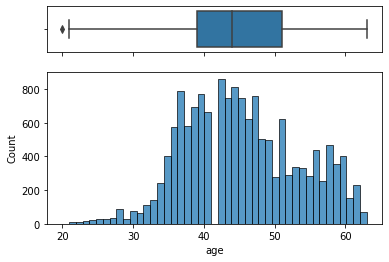

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


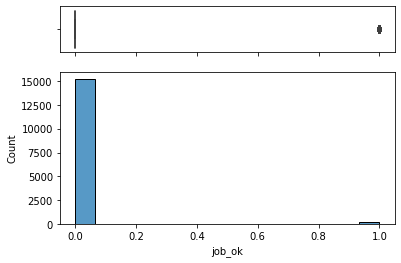

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


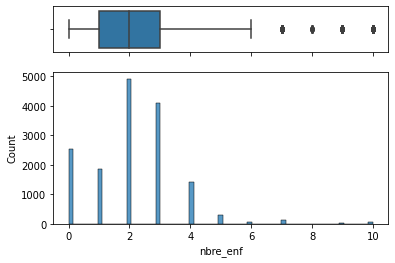

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


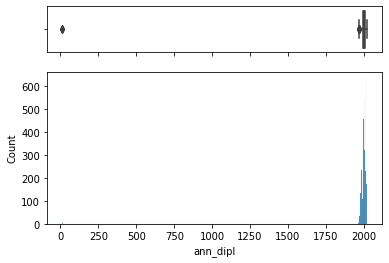

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


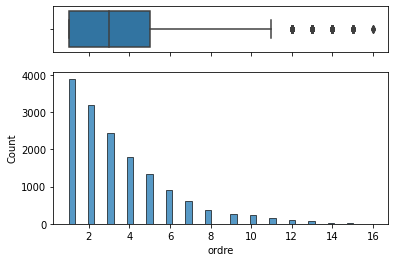

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


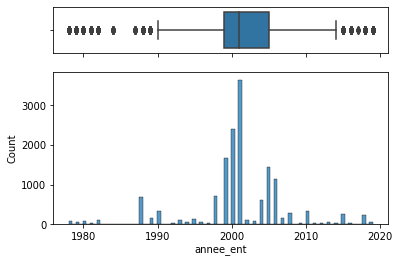

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


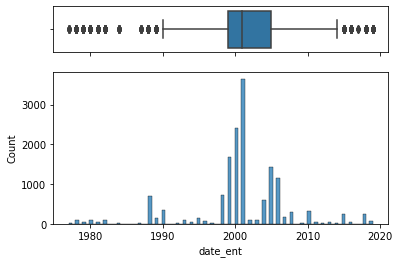

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


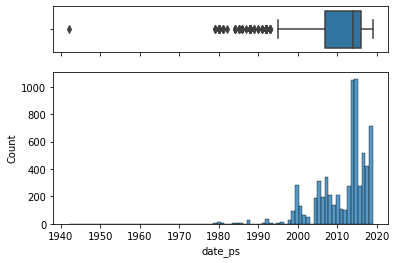

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


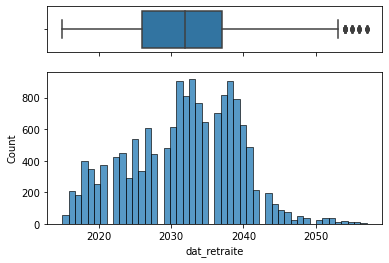

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


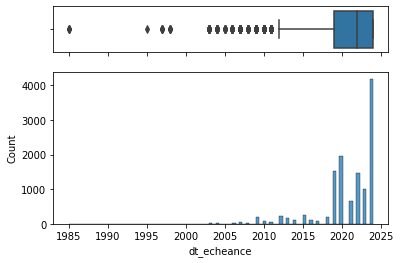

c:\users\kitty\pycharmprojects\testaffichage\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


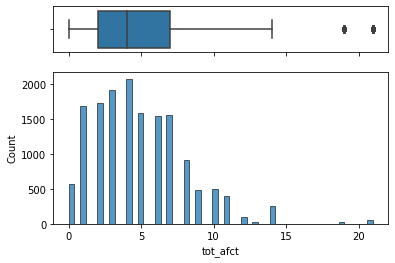

In [98]:
for  col in quantitative:  
        f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.15, .5)})
        sns.histplot(df[col], ax = ax_hist)
        sns.boxplot(df[col], color = '#1f77b4', ax = ax_box)
        ax_box.set(xlabel='')
        plt.show()

### II Bivarie

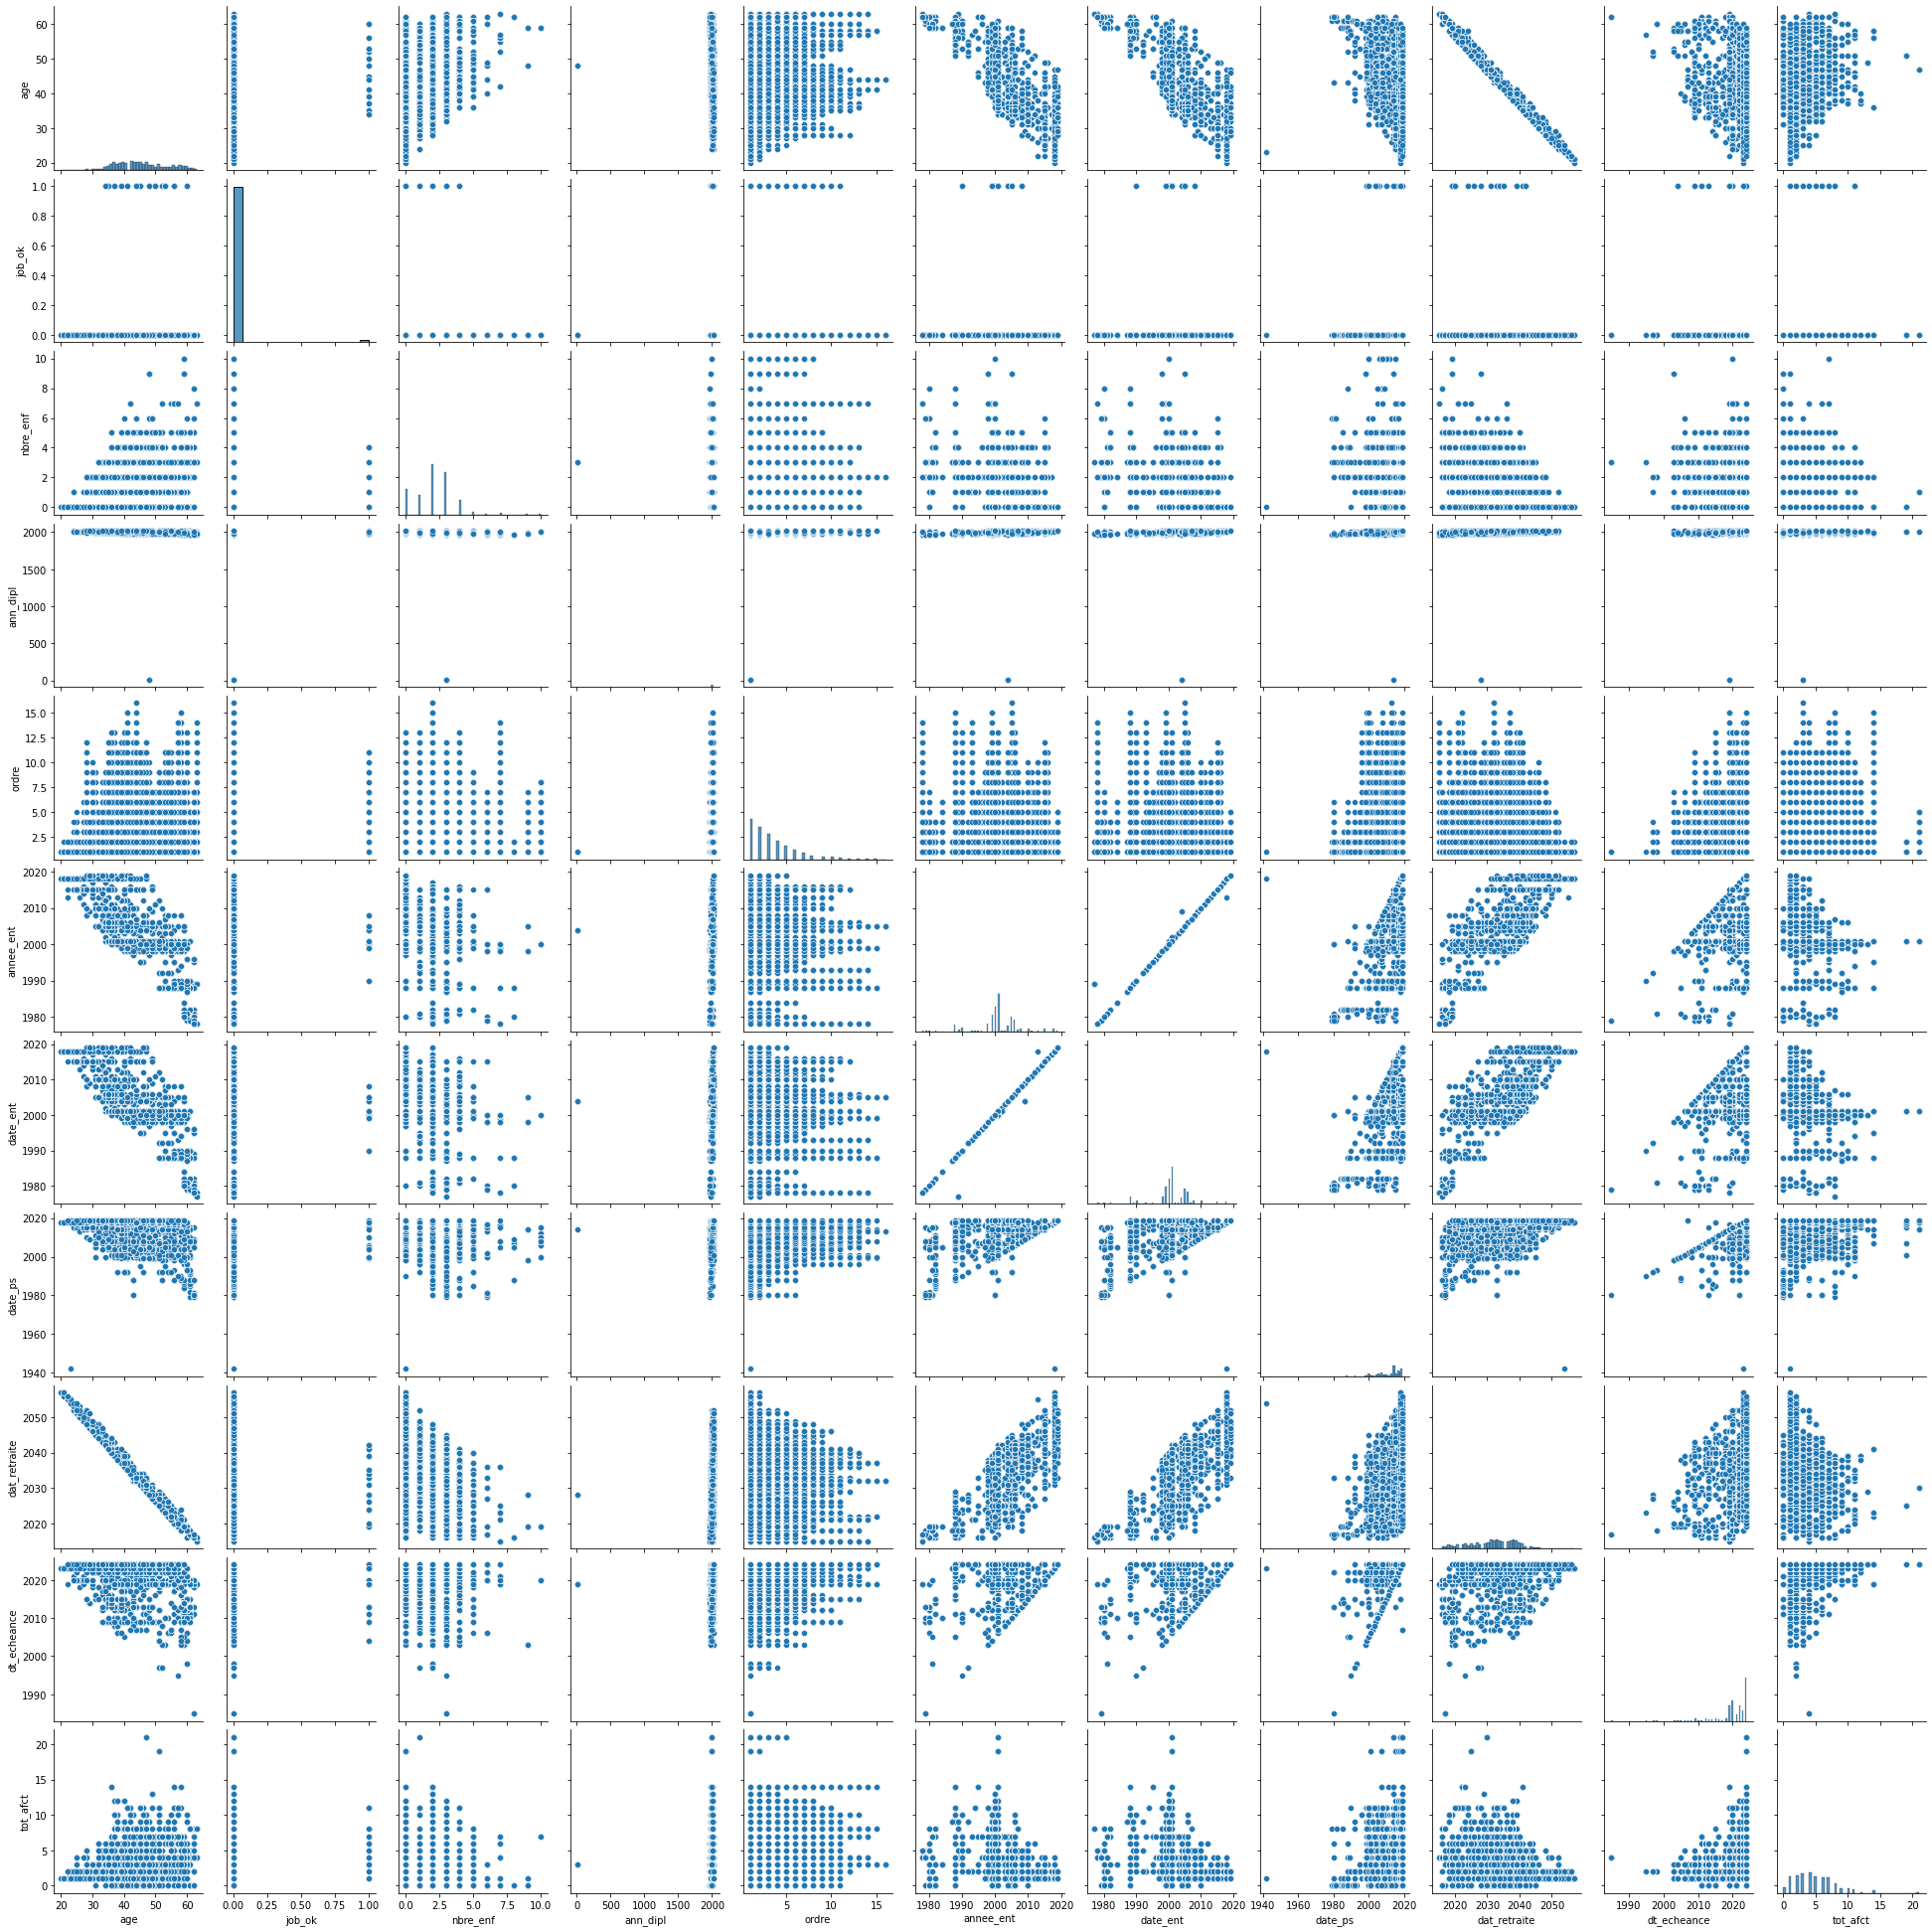

In [97]:
#Association entre 2 variables quantitatives
sns.pairplot(df)
plt.show()

<AxesSubplot:>

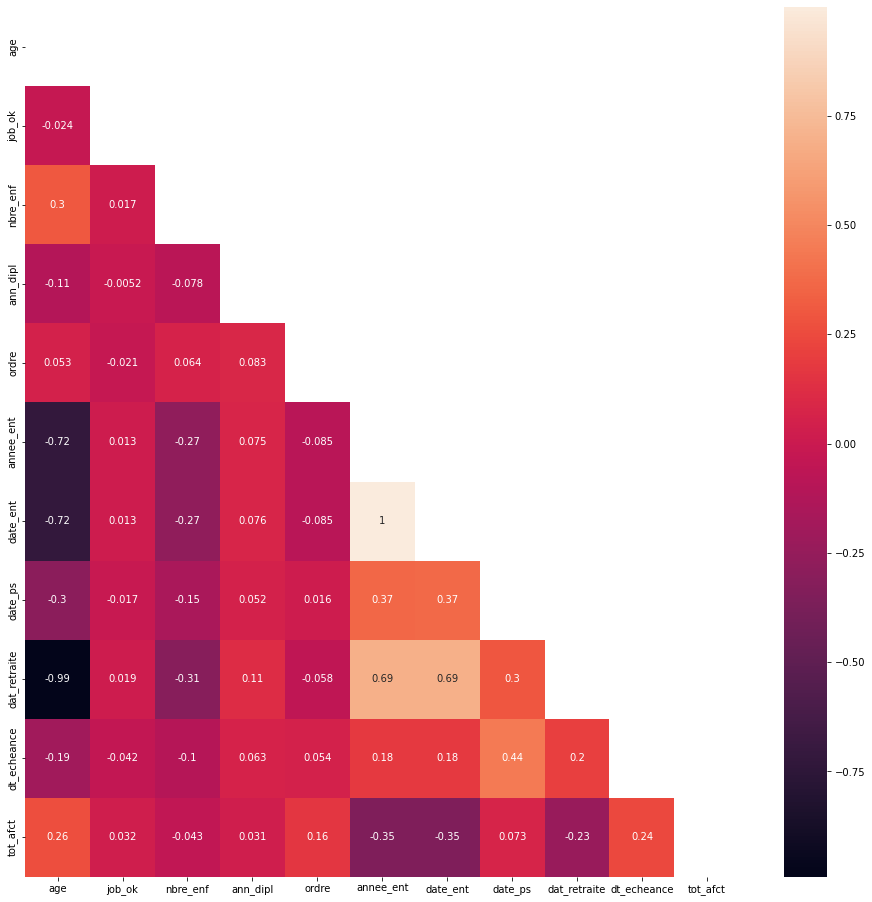

In [86]:
std_no_nul=[]
std_nul=[]
for  col in quantitative:  
    if np.std(df[col])!=0:
        std_no_nul.append(col)
    else:
        std_nul.append(col)
f, axes = plt.subplots(1, 1, figsize=(16, 16), sharex=False)
matrix = np.triu(df[std_no_nul].corr())
sns.heatmap(df[std_no_nul].corr(), annot=True,robust=False, mask=matrix, ax=axes)
#Cette matrice de corrélation nous dit que